<a href="https://colab.research.google.com/github/ArthAgrawal/Audio-Forensics-Research/blob/main/Audio_Forensics_Models_Testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
import matplotlib.pyplot as plt

directories = {
    'Bonafide': '/content/drive/MyDrive/LA_Dataset_Final/Bonafide',
    'Spoof-A01': '/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01',
    'Spoof-A02': '/content/drive/MyDrive/LA_Dataset_Final/Spoof/A02',
    'Spoof-A03': '/content/drive/MyDrive/LA_Dataset_Final/Spoof/A03',
    'Spoof-A04': '/content/drive/MyDrive/LA_Dataset_Final/Spoof/A04',
    'Spoof-A05': '/content/drive/MyDrive/LA_Dataset_Final/Spoof/A05',
    'Spoof-A06': '/content/drive/MyDrive/LA_Dataset_Final/Spoof/A06',
}

Bonafide: 4087 files
Spoof-A01: 3800 files
Spoof-A02: 3800 files
Spoof-A03: 3800 files
Spoof-A04: 3800 files
Spoof-A05: 3800 files
Spoof-A06: 3800 files


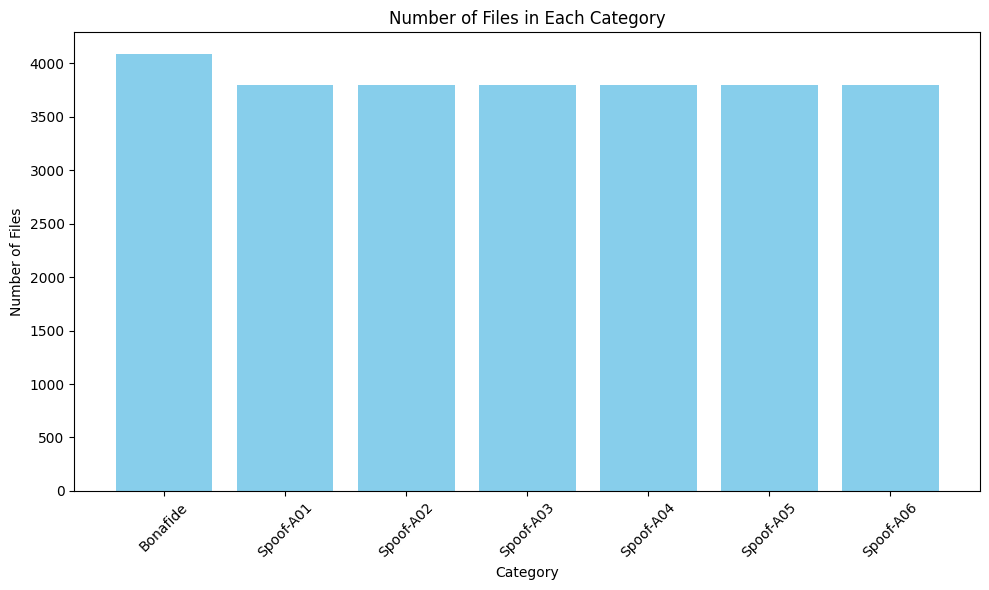

In [ ]:
import os
import matplotlib.pyplot as plt

# Directories and their respective paths
directories = {
    'Bonafide': ['/content/drive/MyDrive/LA_Dataset_Final/Bonafide', '/content/drive/MyDrive/asvpoof_data/real'],
    'Spoof-A01': ['/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01'],
    'Spoof-A02': ['/content/drive/MyDrive/LA_Dataset_Final/Spoof/A02'],
    'Spoof-A03': ['/content/drive/MyDrive/LA_Dataset_Final/Spoof/A03'],
    'Spoof-A04': ['/content/drive/MyDrive/LA_Dataset_Final/Spoof/A04'],
    'Spoof-A05': ['/content/drive/MyDrive/LA_Dataset_Final/Spoof/A05'],
    'Spoof-A06': ['/content/drive/MyDrive/LA_Dataset_Final/Spoof/A06'],
}

# Count the number of files in each directory
file_counts = {}
for category, paths in directories.items():
    file_count = 0
    for path in paths:
        if os.path.exists(path):
            file_count += len(os.listdir(path))
    file_counts[category] = file_count

# Print the file counts
for category, count in file_counts.items():
    print(f'{category}: {count} files')

# Plot the results
plt.figure(figsize=(10, 6))
plt.bar(file_counts.keys(), file_counts.values(), color='skyblue')
plt.xlabel('Category')
plt.ylabel('Number of Files')
plt.title('Number of Files in Each Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

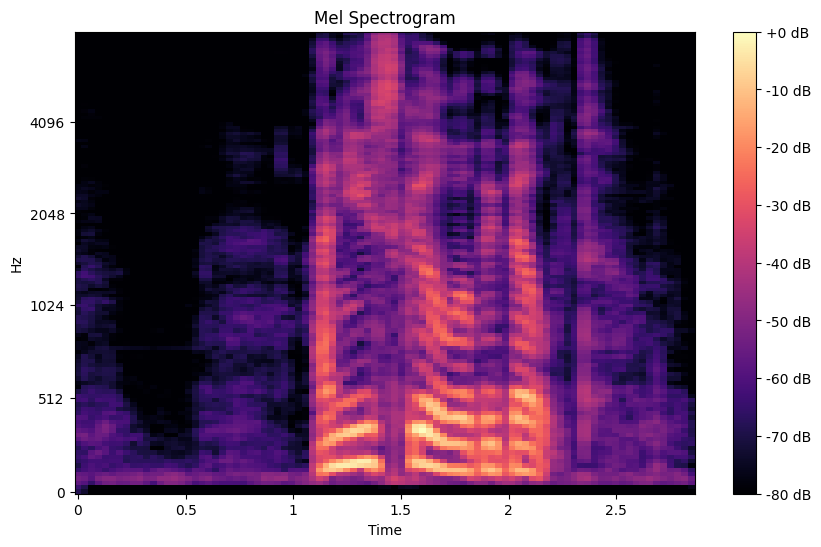

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load the audio file
audio_path = '/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac'
y, sr = librosa.load(audio_path, sr=None)

# Compute the Mel spectrogram
S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)

# Convert the Mel spectrogram to decibels (log scale)
S_dB = librosa.power_to_db(S, ref=np.max)

# Plot and display the Mel spectrogram
plt.figure(figsize=(10, 6))
librosa.display.specshow(S_dB, x_axis='time', y_axis='mel', sr=sr)
plt.colorbar(format='%+2.0f dB')
plt.title('Mel Spectrogram')
plt.show()


In [ ]:
import librosa

def get_audio_duration(audio_path):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)  # sr=None to preserve original sample rate

    # Calculate the duration in seconds
    duration = librosa.get_duration(y=y, sr=sr)

    return duration

# Example usage:
audio_path = "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A02/LA_T_1003665.flac"
duration = get_audio_duration(audio_path)
print(f"The duration of the audio file is {duration:.2f} seconds.")


The duration of the audio file is 3.39 seconds.


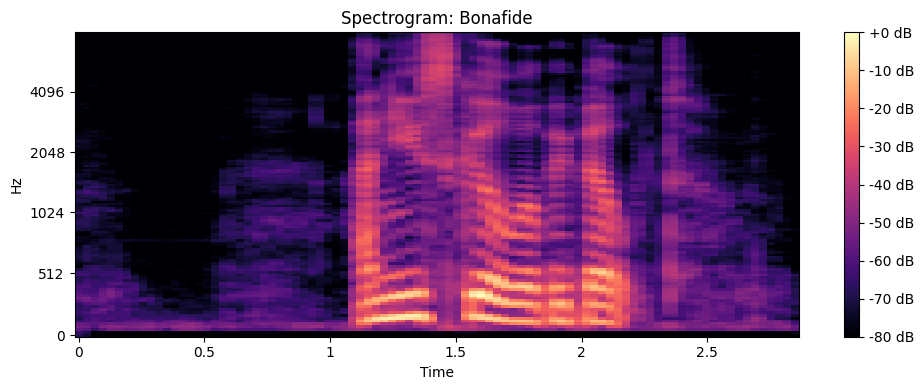

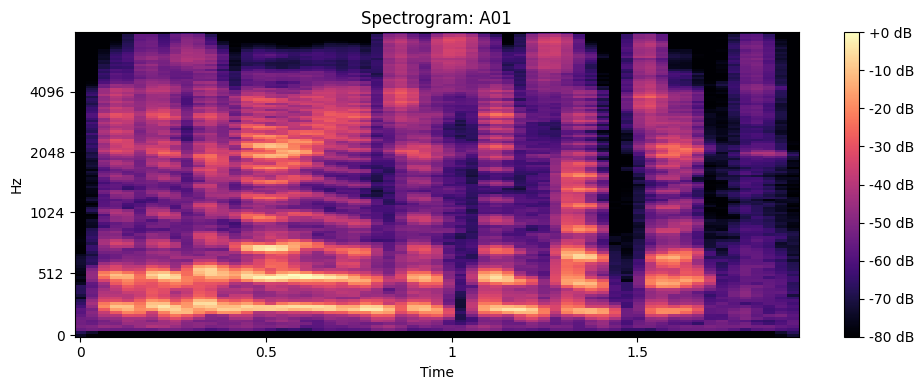

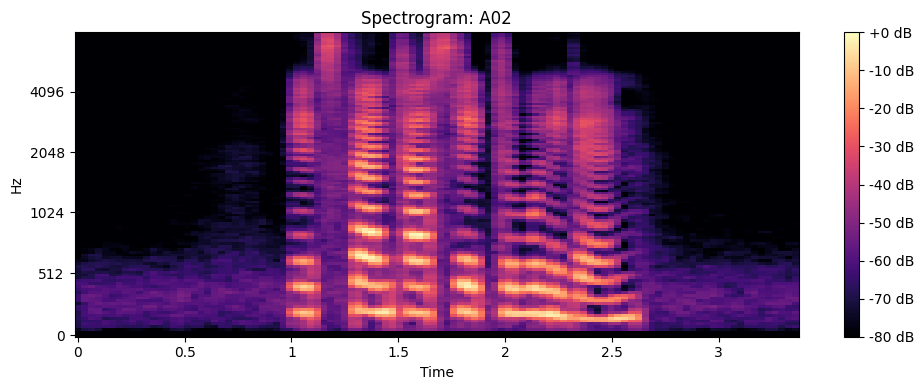

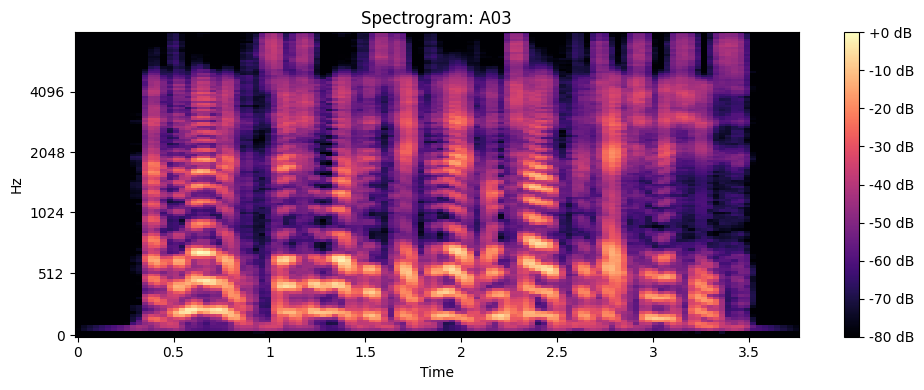

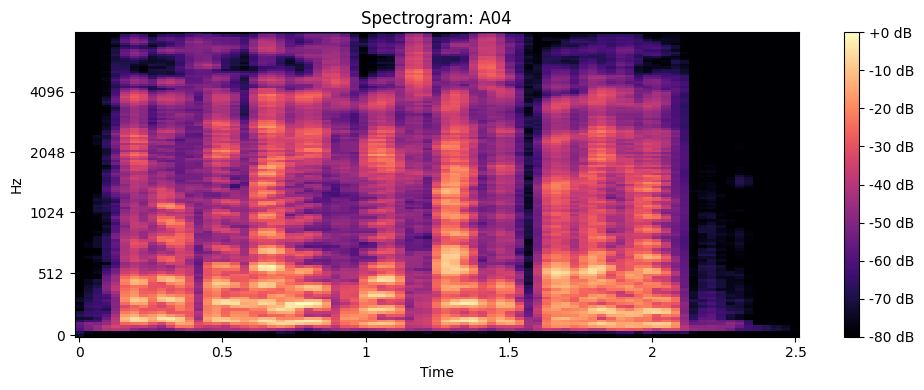

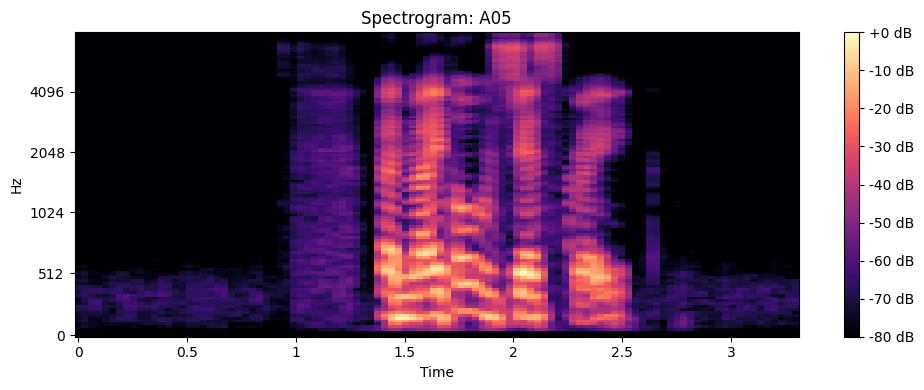

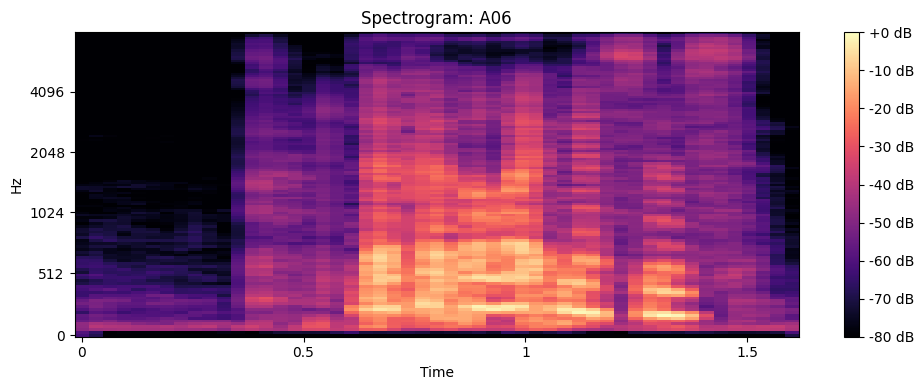

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot spectrogram
def plot_spectrogram(audio_path, title="Spectrogram"):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Compute Mel Spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

audio_paths = {
    "Bonafide": "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac",
    "A01": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01/LA_T_1000648.flac",
    "A02": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A02/LA_T_1003665.flac",
    "A03": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A03/LA_T_1001074.flac",
    "A04": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A04/LA_T_1000137.flac",
    "A05": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A05/LA_T_1001114.flac",
    "A06": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A06/LA_T_1011022.flac",
}

# Loop through each class and plot the spectrogram
for label, path in audio_paths.items():
    plot_spectrogram(path, title=f"Spectrogram: {label}")


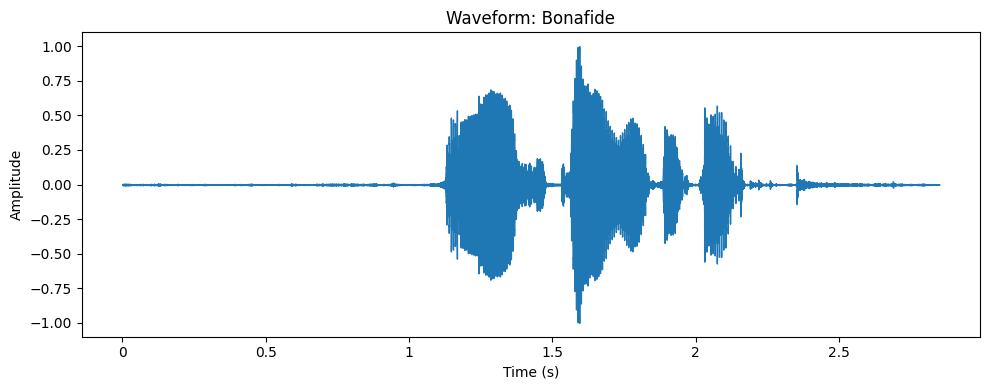

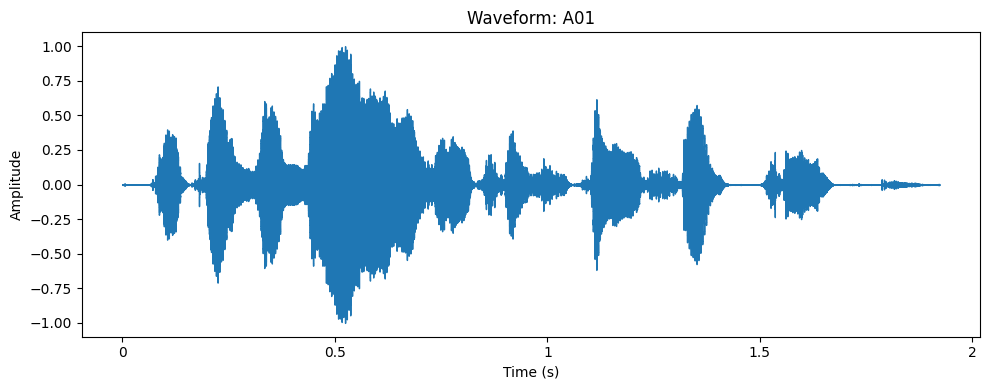

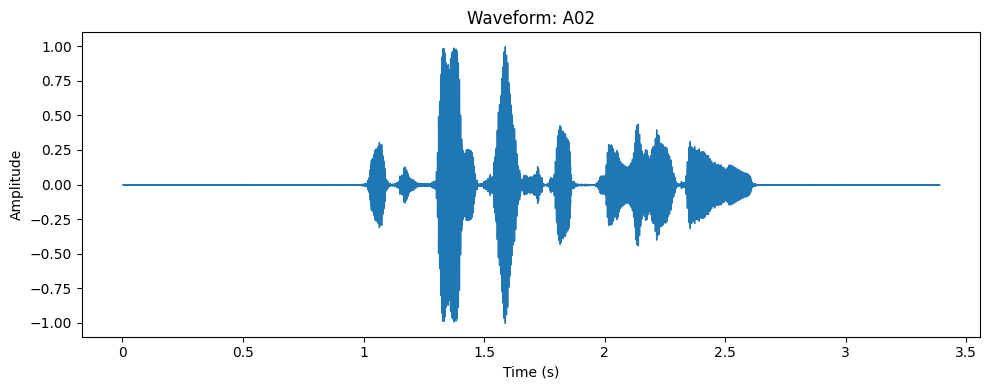

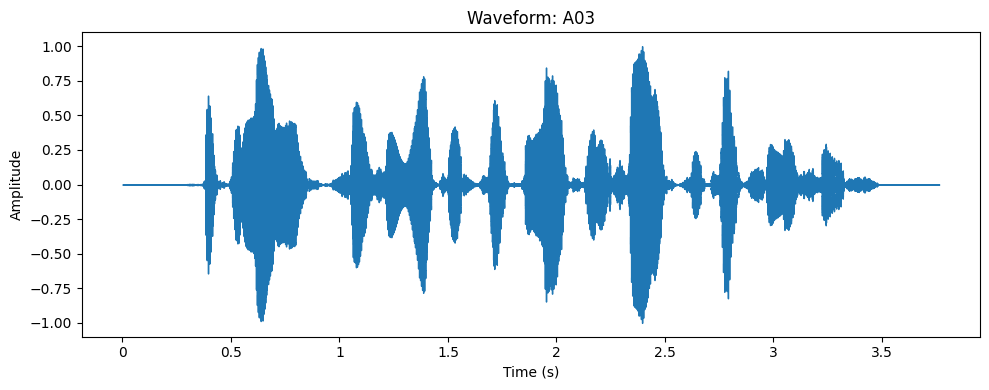

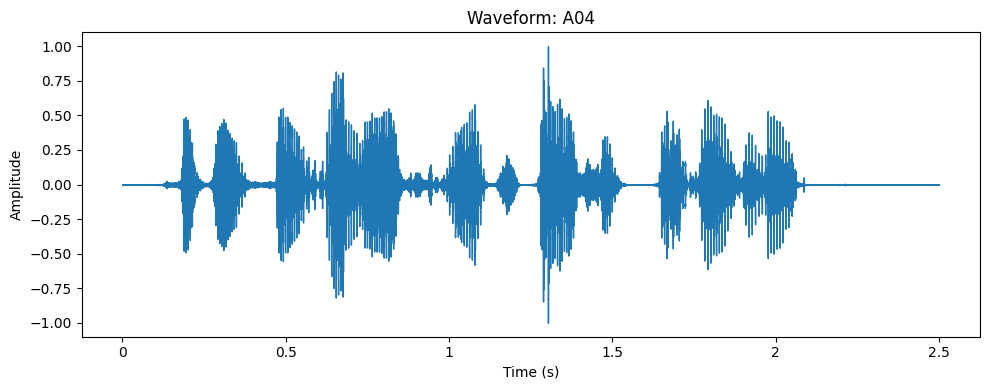

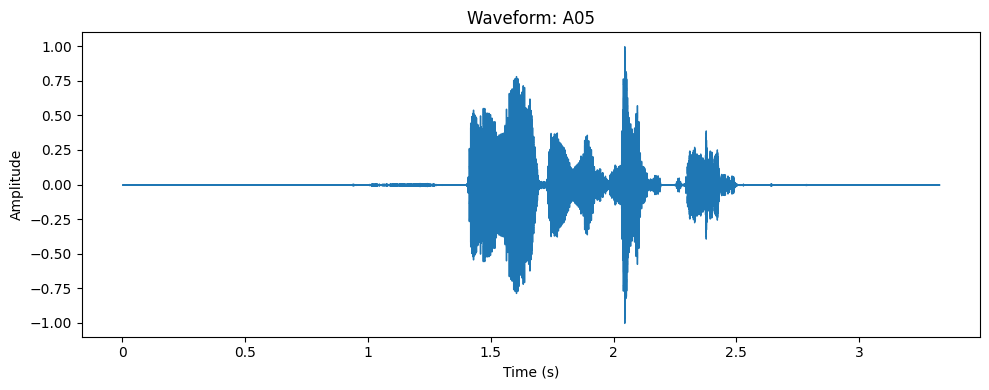

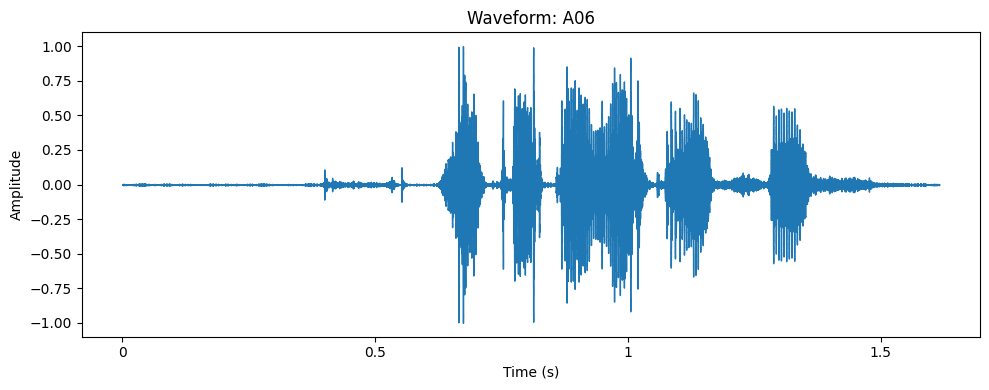

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Function to plot the amplitude vs time (waveform)
def plot_waveform(audio_path, title="Waveform"):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Plot the waveform (amplitude vs time)
    plt.figure(figsize=(10, 4))
    librosa.display.waveshow(y, sr=sr)
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.tight_layout()
    plt.show()

audio_paths = {
    "Bonafide": "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac",
    "A01": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01/LA_T_1000648.flac",
    "A02": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A02/LA_T_1003665.flac",
    "A03": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A03/LA_T_1001074.flac",
    "A04": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A04/LA_T_1000137.flac",
    "A05": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A05/LA_T_1001114.flac",
    "A06": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A06/LA_T_1011022.flac",
}

# Loop through each class and plot the waveform
for label, path in audio_paths.items():
    plot_waveform(path, title=f"Waveform: {label}")


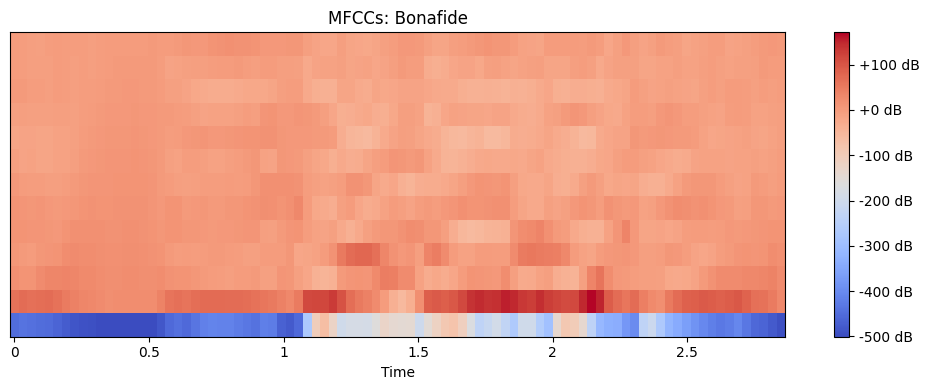

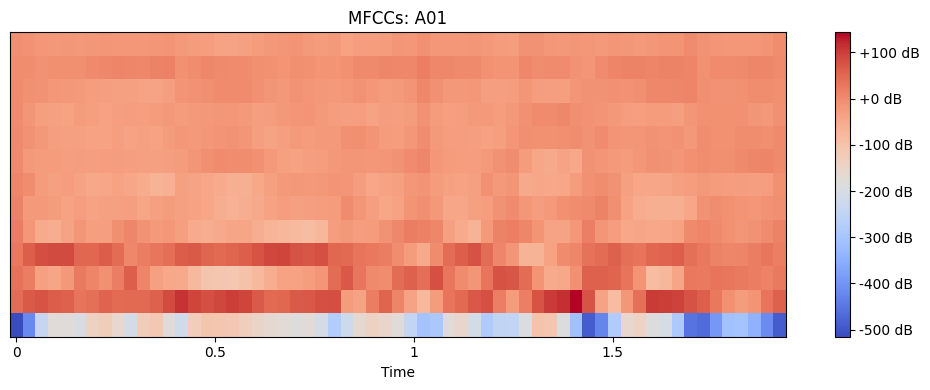

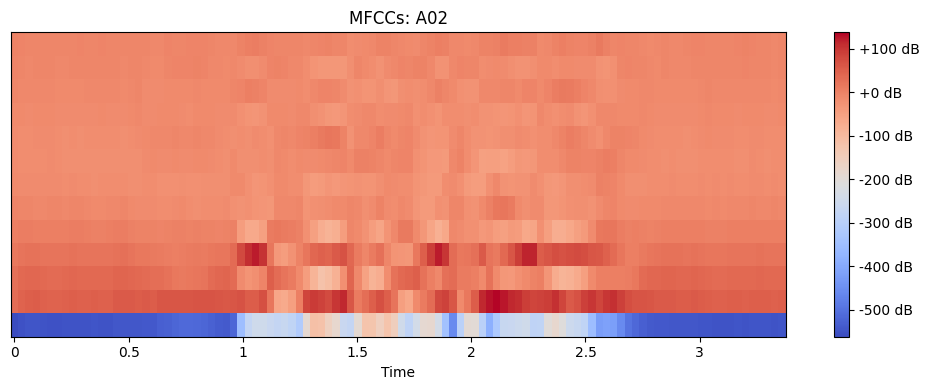

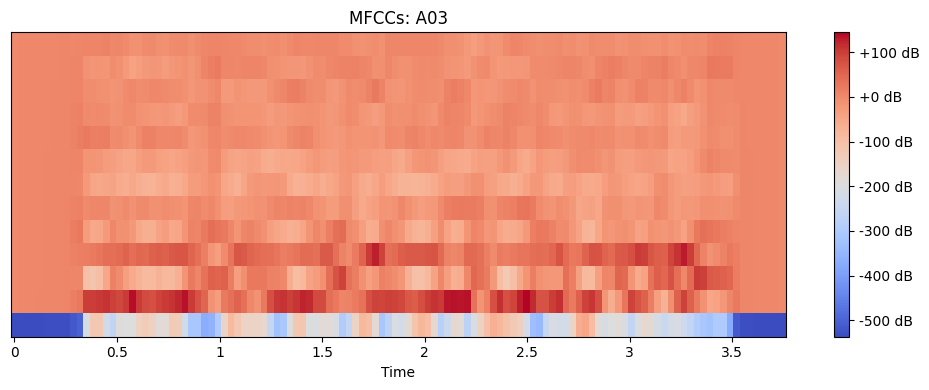

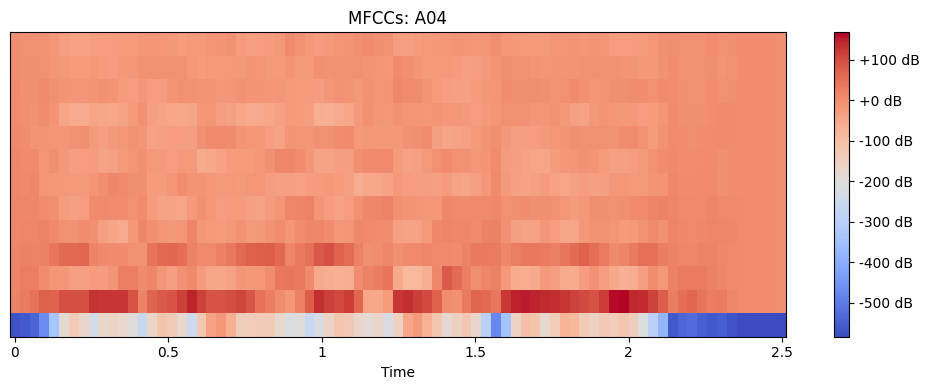

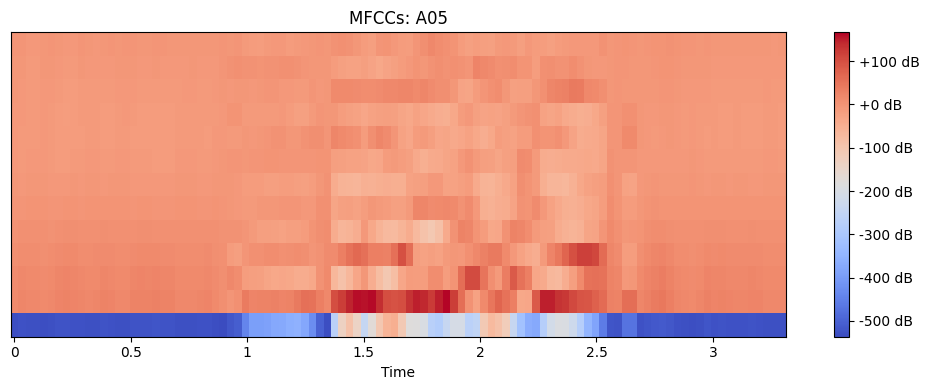

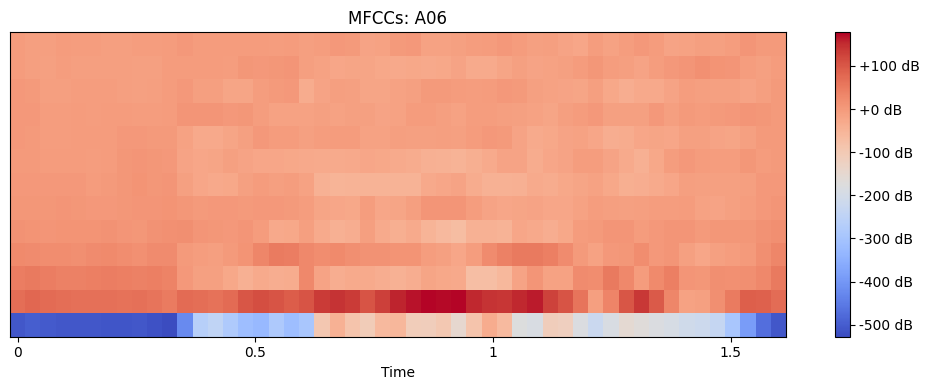

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Function to plot MFCCs
def plot_mfccs(audio_path, title="MFCCs"):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)

    # Compute MFCCs
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)

    # Plot MFCCs
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, sr=sr, x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.tight_layout()
    plt.show()

audio_paths = {
    "Bonafide": "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac",
    "A01": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01/LA_T_1000648.flac",
    "A02": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A02/LA_T_1003665.flac",
    "A03": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A03/LA_T_1001074.flac",
    "A04": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A04/LA_T_1000137.flac",
    "A05": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A05/LA_T_1001114.flac",
    "A06": "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A06/LA_T_1011022.flac",
}

# Loop through each class and plot MFCCs
for label, path in audio_paths.items():
    plot_mfccs(path, title=f"MFCCs: {label}")


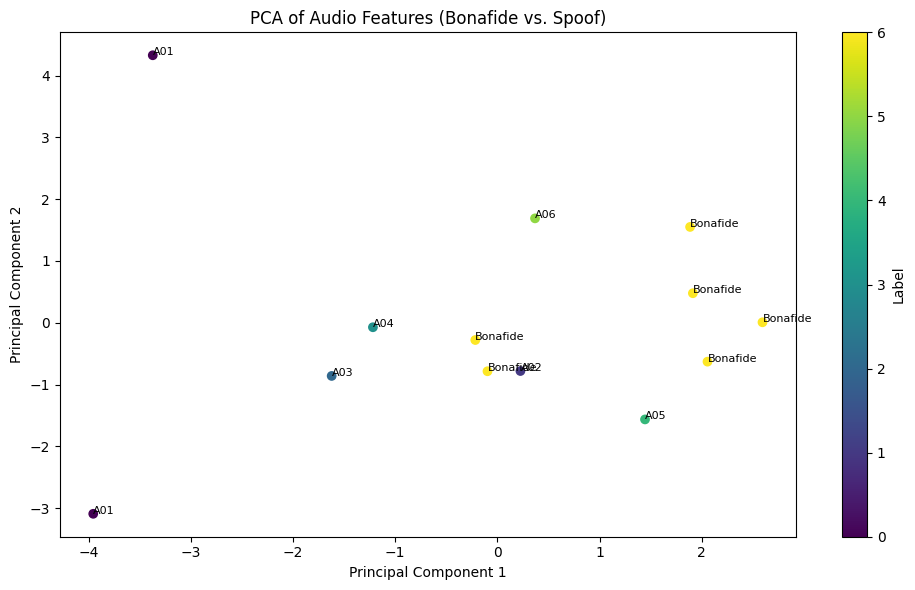

In [ ]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Function to extract MFCC features from an audio file
def extract_features(audio_path):
    y, sr = librosa.load(audio_path, sr=None)
    # Extract MFCC features (Mel-frequency cepstral coefficients)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    # Take the mean of each MFCC feature across time frames
    mfcc_mean = np.mean(mfcc, axis=1)
    return mfcc_mean

# Paths to the Bonafide and Spoof audio files (A01 - A06)
audio_paths = {
    "Bonafide": [
    "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac",
    "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1007571.flac",
    "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1007663.flac",
    "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1021790.flac",
    "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1045294.flac",
    "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1075302.flac",
    ],
    "A01": [
    "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01/LA_T_1000648.flac",
    "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01/LA_T_1002656.flac",
    ],
    "A02": [
        "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A02/LA_T_1003665.flac"
    ],
    "A03": [
        "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A03/LA_T_1001074.flac"
    ],
    "A04": [
        "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A04/LA_T_1000137.flac"
    ],
    "A05": [
        "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A05/LA_T_1001114.flac"
    ],
    "A06": [
        "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A06/LA_T_1011022.flac"
    ]
}

# Prepare data and labels
features = []
labels = []

# Extract features from all audio files
for label, paths in audio_paths.items():
    for path in paths:
        mfcc = extract_features(path)
        features.append(mfcc)
        labels.append(label)

# Convert features and labels to numpy arrays
features = np.array(features)

# Encode the labels as numeric values
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Standardize the features (important for PCA/t-SNE)
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Perform PCA for dimensionality reduction (optional: use t-SNE as well)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Alternatively, for t-SNE:
# tsne = TSNE(n_components=2, random_state=42)
# features_tsne = tsne.fit_transform(features_scaled)

# Plotting the results
plt.figure(figsize=(10, 6))
# Plot PCA or t-SNE result
scatter = plt.scatter(features_pca[:, 0], features_pca[:, 1], c=labels_encoded, cmap='viridis', label='Data points')

# Add labels for each point (optional)
for i, txt in enumerate(labels):
    plt.annotate(txt, (features_pca[i, 0], features_pca[i, 1]), fontsize=8)

plt.title('PCA of Audio Features (Bonafide vs. Spoof)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Label')
plt.tight_layout()
plt.show()


In [ ]:
import os
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
!pip install audiomentations


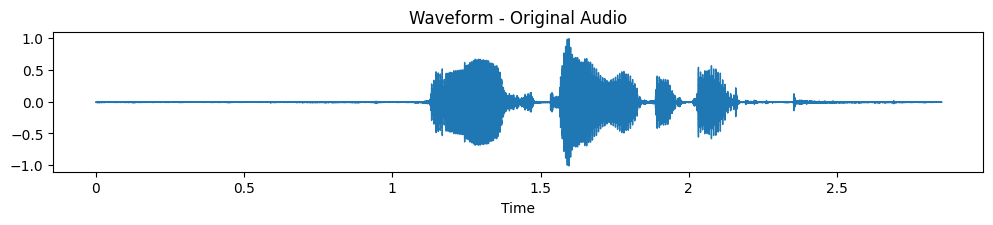

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# Define the audio augmentation pipeline
audio_augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0),
    Shift(min_shift=-0.5, max_shift=0.5, p=1.0),
])

# Load an audio file
file_path = '/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac'
y, sr = librosa.load(file_path, sr=11000)

# Function to plot the waveform and Mel spectrogram
def plot_audio(y, sr, title):
    # Plot waveform
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {title}')

    # # Plot Mel spectrogram
    # mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)
    # mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    # plt.subplot(2, 1, 2)
    # librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr)
    # plt.title(f'Mel Spectrogram - {title}')
    # plt.colorbar(format='%+2.0f dB')
    # plt.tight_layout()
    # plt.show()

# Plot the original audio
plot_audio(y, sr, "Original Audio")


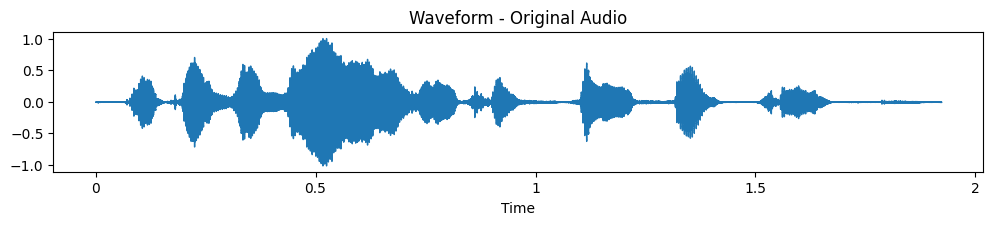

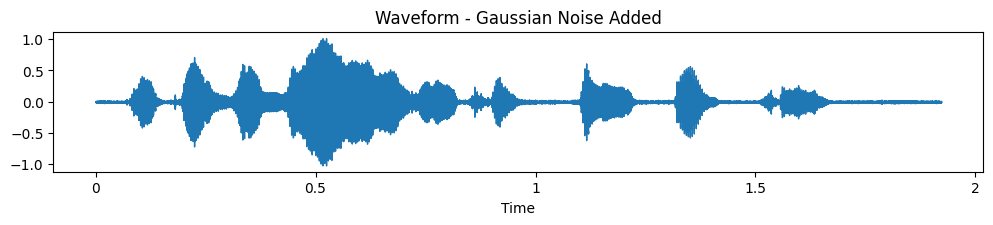

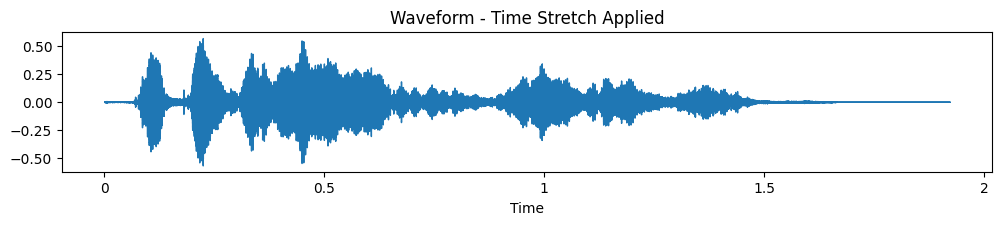

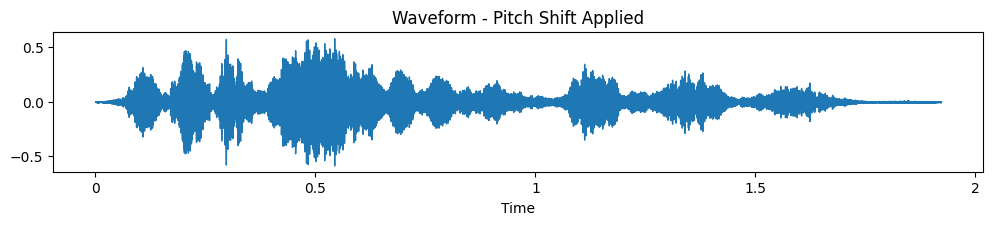

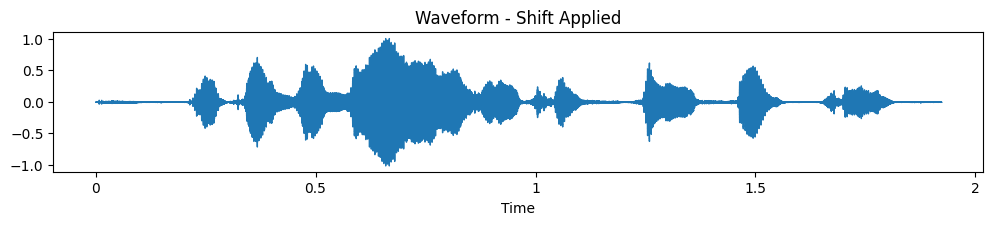

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# Define the audio augmentation pipeline
audio_augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=1.0),
    PitchShift(min_semitones=-4, max_semitones=4, p=1.0),
    Shift(min_shift=-0.5, max_shift=0.5, p=1.0),
])

# Load an audio file
file_path = "/content/drive/MyDrive/LA_Dataset_Final/Spoof/A01/LA_T_1000648.flac"
y, sr = librosa.load(file_path, sr=11000)

# Function to plot the waveform and Mel spectrogram
def plot_audio(y, sr, title):
    # Plot waveform
    plt.figure(figsize=(12, 4))
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform - {title}')

    # # Plot Mel spectrogram
    # mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)
    # mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    # plt.subplot(2, 1, 2)
    # librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel', sr=sr)
    # plt.title(f'Mel Spectrogram - {title}')
    # plt.colorbar(format='%+2.0f dB')
    # plt.tight_layout()
    # plt.show()

# Plot the original audio
plot_audio(y, sr, "Original Audio")

# Apply each augmentation one by one and plot the results

# 1. Add Gaussian Noise
augmented_y = AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=1.0)(samples=y, sample_rate=sr)
plot_audio(augmented_y, sr, "Gaussian Noise Added")

# 2. Time Stretch
augmented_y = TimeStretch(min_rate=0.8, max_rate=1.25, p=1.0)(samples=y, sample_rate=sr)
plot_audio(augmented_y, sr, "Time Stretch Applied")

# 3. Pitch Shift
augmented_y = PitchShift(min_semitones=-4, max_semitones=4, p=1.0)(samples=y, sample_rate=sr)
plot_audio(augmented_y, sr, "Pitch Shift Applied")

# 4. Shift
augmented_y = Shift(min_shift=-0.5, max_shift=0.5, p=1.0)(samples=y, sample_rate=sr)
plot_audio(augmented_y, sr, "Shift Applied")


<ipython-input-56-6c5997c00052>:27: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)


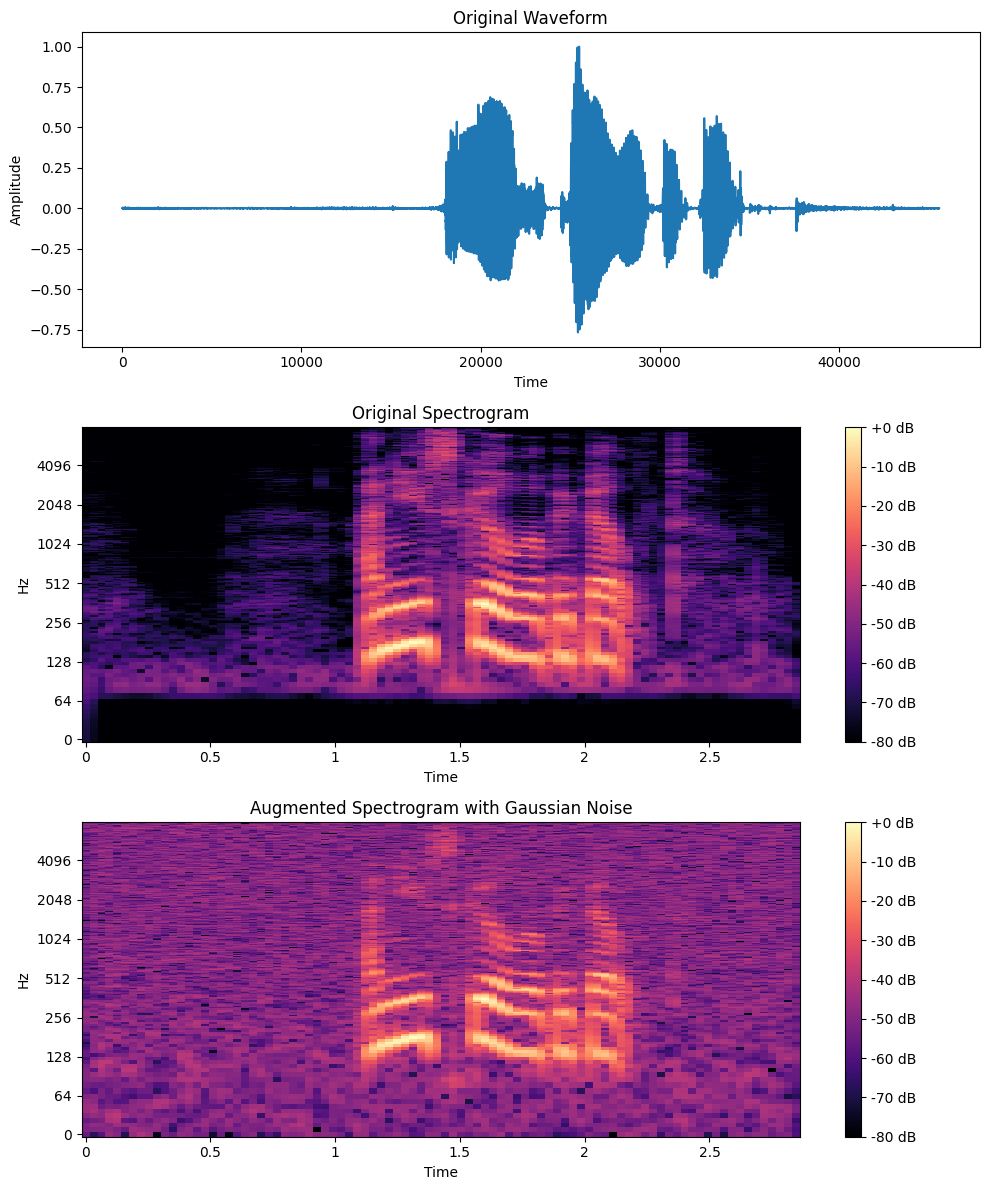

In [ ]:
from audiomentations import Compose, AddGaussianNoise
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Define audio augmentation pipeline with more increased Gaussian noise
audio_augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.02, max_amplitude=0.03, p=1.0),  # Increased Gaussian noise amplitude
])

# Function to apply audio augmentations
def augment_audio(y, sr):
    augmented_y = audio_augmentations(samples=y, sample_rate=sr)
    return augmented_y

# Load an example audio file
file_path = "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac"
y, sr = librosa.load(file_path, sr=None)

# Apply augmentations (only Gaussian noise)
augmented_y = augment_audio(y, sr)

# Generate spectrograms for both original and augmented waveforms
def plot_spectrogram(y, sr, title):
    # Compute spectrogram (Short-Time Fourier Transform)
    D = librosa.amplitude_to_db(librosa.stft(y), ref=np.max)

    # Plot the spectrogram
    librosa.display.specshow(D, x_axis='time', y_axis='log', sr=sr)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)

# Visualize original waveform and spectrogram
plt.figure(figsize=(10, 12))

# Original waveform
plt.subplot(3, 1, 1)
plt.plot(y)
plt.title('Original Waveform')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Spectrogram of original audio
plt.subplot(3, 1, 2)
plot_spectrogram(y, sr, 'Original Spectrogram')

# Spectrogram of augmented audio
plt.subplot(3, 1, 3)
plot_spectrogram(augmented_y, sr, 'Augmented Spectrogram with Gaussian Noise')

plt.tight_layout()
plt.show()


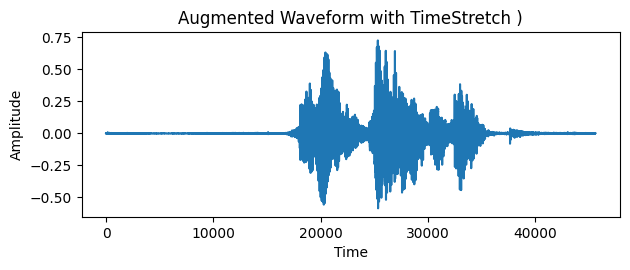

In [ ]:
from audiomentations import Compose, TimeStretch
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Define audio augmentation pipeline with TimeStretch only (slow effect)
audio_augmentations = Compose([
    TimeStretch(min_rate=0.99, max_rate=0.99, p=1.0),  # Apply slow time stretch with rate 0.8
])

# Function to apply audio augmentations
def augment_audio(y, sr):
    augmented_y = audio_augmentations(samples=y, sample_rate=sr)
    return augmented_y

# Load an example audio file
file_path = "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac"
y, sr = librosa.load(file_path, sr=None)

# # Visualize original waveform
# plt.figure(figsize=(10, 6))
# plt.subplot(2, 1, 1)
# plt.plot(y)
# plt.title('Original Waveform')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')

# Apply TimeStretch (slow)
augmented_y = augment_audio(y, sr)

# Visualize augmented waveform
plt.subplot(2, 1, 2)
plt.plot(augmented_y)
plt.title('Augmented Waveform with TimeStretch )')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


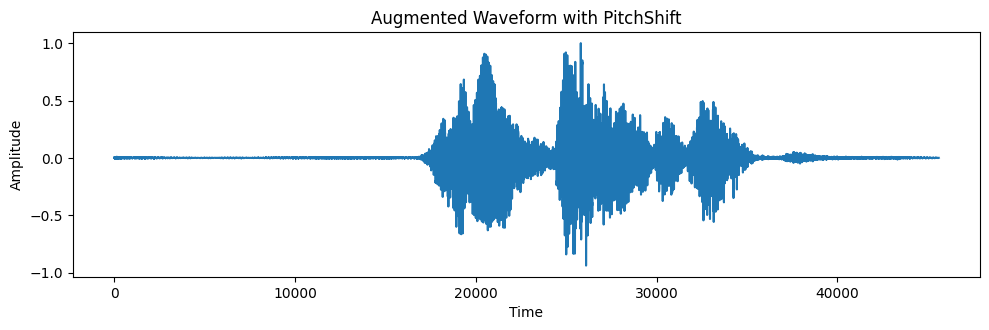

In [ ]:
from audiomentations import Compose, PitchShift
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Define audio augmentation pipeline with PitchShift only (upshift by +2 semitones)
audio_augmentations = Compose([
    PitchShift(min_semitones=2, max_semitones=2, p=1.0),  # Apply pitch shift up by +2 semitones
])

# Function to apply audio augmentations
def augment_audio(y, sr):
    augmented_y = audio_augmentations(samples=y, sample_rate=sr)
    return augmented_y

# Load an example audio file
file_path = "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac"
y, sr = librosa.load(file_path, sr=None)

# Normalize the waveform to the range -1 to 1
def normalize_waveform(y):
    return np.clip(y / np.max(np.abs(y)), -1, 1)

# Normalize original and augmented audio
y_normalized = normalize_waveform(y)

# Apply PitchShift (upshift)
augmented_y = augment_audio(y, sr)
augmented_y_normalized = normalize_waveform(augmented_y)

# Visualize the original and augmented waveform (Pitch Shifted) with the same figure size
plt.figure(figsize=(10, 6))

# # Original waveform
# plt.subplot(2, 1, 1)
# plt.plot(y_normalized)
# plt.title('Original Waveform')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')

# Augmented waveform (Pitch Shifted)
plt.subplot(2, 1, 2)
plt.plot(augmented_y_normalized)
plt.title('Augmented Waveform with PitchShift')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


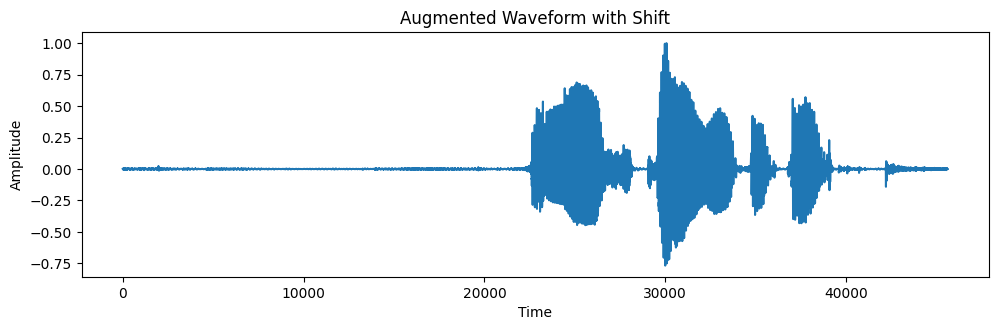

In [ ]:
from audiomentations import Compose, Shift
import librosa
import matplotlib.pyplot as plt
import numpy as np

# Define audio augmentation pipeline with Shift only
audio_augmentations = Compose([
    Shift(min_shift=0.1, max_shift=0.1, p=1.0),  # Apply shift by 0.1 seconds
])

# Function to apply audio augmentations
def augment_audio(y, sr):
    augmented_y = audio_augmentations(samples=y, sample_rate=sr)
    return augmented_y

# Load an example audio file
file_path = "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1000406.flac"
y, sr = librosa.load(file_path, sr=None)

# Normalize the waveform to the range -1 to 1
def normalize_waveform(y):
    return np.clip(y / np.max(np.abs(y)), -1, 1)

# Normalize original and augmented audio
y_normalized = normalize_waveform(y)

# Apply Shift
augmented_y = augment_audio(y, sr)
augmented_y_normalized = normalize_waveform(augmented_y)

# Visualize the original and augmented waveform (Shifted) with the same figure size
plt.figure(figsize=(10, 6))

# # Original waveform
# plt.subplot(2, 1, 1)
# plt.plot(y_normalized)
# plt.title('Original Waveform')
# plt.xlabel('Time')
# plt.ylabel('Amplitude')

# Augmented waveform (Shifted)
plt.subplot(2, 1, 2)
plt.plot(augmented_y_normalized)
plt.title('Augmented Waveform with Shift')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


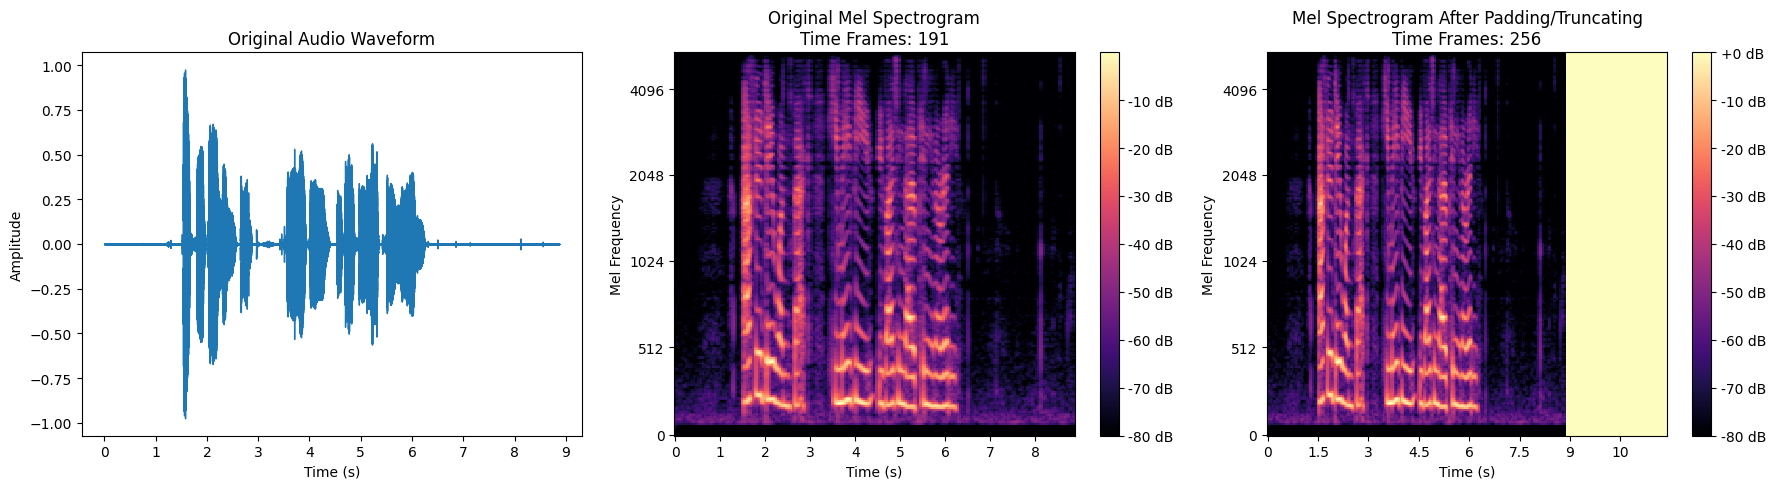

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

# Load original audio
file_path = "/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_4938812.flac"
y, sr = librosa.load(file_path, sr=11000)

# Compute Mel spectrogram of original audio
mel_spectrogram_original = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=256)
mel_spectrogram_db_original = librosa.power_to_db(mel_spectrogram_original, ref=np.max)

# Time frames for the Mel spectrogram
time_frames_original = mel_spectrogram_db_original.shape[1]

# Pad or truncate Mel spectrogram to a fixed number of frames (max_time_frames)
max_time_frames = 256
if mel_spectrogram_db_original.shape[1] > max_time_frames:
    mel_spectrogram_db_truncated = mel_spectrogram_db_original[:, :max_time_frames]
    time_frames_truncated = max_time_frames
else:
    pad_width = max_time_frames - mel_spectrogram_db_original.shape[1]
    mel_spectrogram_db_truncated = np.pad(mel_spectrogram_db_original, ((0, 0), (0, pad_width)), mode='constant')
    time_frames_truncated = max_time_frames

# Plotting the visualizations (all 3 graphs horizontally)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))  # 1x3 grid for horizontal layout

# Original Audio Waveform
axes[0].set_title("Original Audio Waveform")
librosa.display.waveshow(y, sr=sr, ax=axes[0])
axes[0].set_xlabel("Time (s)")
axes[0].set_ylabel("Amplitude")

# Mel Spectrogram of Original Audio
axes[1].set_title(f"Original Mel Spectrogram\nTime Frames: {time_frames_original}")
img = librosa.display.specshow(mel_spectrogram_db_original, x_axis='time', y_axis='mel', sr=sr, ax=axes[1])
axes[1].set_xlabel("Time (s)")
axes[1].set_ylabel("Mel Frequency")
fig.colorbar(img, ax=axes[1], format='%+2.0f dB')

# Mel Spectrogram after Padding/Truncating
axes[2].set_title(f"Mel Spectrogram After Padding/Truncating\nTime Frames: {time_frames_truncated}")
img = librosa.display.specshow(mel_spectrogram_db_truncated, x_axis='time', y_axis='mel', sr=sr, ax=axes[2])
axes[2].set_xlabel("Time (s)")
axes[2].set_ylabel("Mel Frequency")
fig.colorbar(img, ax=axes[2], format='%+2.0f dB')

plt.tight_layout()
plt.show()


In [ ]:
import os
import librosa
from tqdm import tqdm

# Function to get the duration (in time frames) of an audio file
def get_audio_time_frames(audio_file, sr=11000):
    # Load the audio file
    y, _ = librosa.load(audio_file, sr=sr)

    # Return the number of samples (time frames) in the audio
    return len(y)

# Path to the folder containing audio files
audio_folder = '/content/drive/MyDrive/LA_Dataset_Final/Bonafide'

# List to store (file_name, time_frames) pairs
audio_time_frames = []

# List all audio files in the folder
audio_files = os.listdir(audio_folder)

# Use tqdm to display a progress bar while processing the files
for audio_file in tqdm(audio_files, desc="Processing audio files"):
    # Get the full path of the audio file
    audio_path = os.path.join(audio_folder, audio_file)

    # Only process audio files (skip directories, etc.)
    if os.path.isfile(audio_path):
        # Get the number of time frames (samples) for this audio file
        time_frames = get_audio_time_frames(audio_path)

        # Store the result in the list
        audio_time_frames.append((audio_file, time_frames))

# Sort the list by time frames in descending order
audio_time_frames.sort(key=lambda x: x[1], reverse=True)

# Output the top 5 longest audio files
top_5_files = audio_time_frames[:5]

# Print the top 5 files with their respective time frames
print("Top 5 longest audio files:")
for file, time in top_5_files:
    print(f"{file}: {time} time frames")


Processing audio files: 100%|██████████| 2580/2580 [00:41<00:00, 61.72it/s] 

Top 5 longest audio files:
LA_T_5235055.flac: 122424 time frames
LA_T_7521161.flac: 102725 time frames
LA_T_4938812.flac: 97581 time frames
LA_T_3036128.flac: 96655 time frames
LA_T_6710807.flac: 85897 time frames


In [ ]:
import os
import numpy as np
from tqdm import tqdm
import librosa
from audiomentations import Compose, AddGaussianNoise, TimeStretch, PitchShift, Shift

# Define audio augmentation pipeline
audio_augmentations = Compose([
    AddGaussianNoise(min_amplitude=0.001, max_amplitude=0.015, p=0.5),
    TimeStretch(min_rate=0.8, max_rate=1.25, p=0.5),
    PitchShift(min_semitones=-4, max_semitones=4, p=0.5),
    Shift(min_shift=-0.5, max_shift=0.5, p=0.5),  # Adjusted argument names
])

# Function to apply audio augmentations
def augment_audio(y, sr):
    """
    Applies the defined augmentations to the audio signal.

    Args:
        y (np.ndarray): Audio signal.
        sr (int): Sampling rate.

    Returns:
        np.ndarray: Augmented audio signal.
    """
    augmented_y = audio_augmentations(samples=y, sample_rate=sr)
    print("Augmentations applied.")  # Log a message indicating that augmentations were applied
    return augmented_y


# Converting audio to Mel spectrogram
def audio_to_mel_spectrogram(file_path, sr=11000, n_mels=256, max_time_frames=256, apply_augmentation=True):
    """
    Converts an audio file to a Mel spectrogram with optional augmentations.

    Args:
        file_path (str): Path to the audio file.
        sr (int): Sampling rate.
        n_mels (int): Number of Mel bands.
        max_time_frames (int): Maximum time frames for spectrogram.
        apply_augmentation (bool): Whether to apply augmentations.

    Returns:
        np.ndarray or None: Mel spectrogram or None if processing fails.
    """
    try:
        y, original_sr = librosa.load(file_path, sr=sr)  # Load audio with target sampling rate

        # Apply augmentations if specified
        if apply_augmentation:
            y = augment_audio(y, sr)

        # Compute Mel spectrogram
        mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=n_mels)
        mel_spectrogram = librosa.power_to_db(mel_spectrogram, ref=np.max)  # Convert to dB scale

        # Truncate or pad to max_time_frames
        if mel_spectrogram.shape[1] > max_time_frames:
            mel_spectrogram = mel_spectrogram[:, :max_time_frames]
        else:
            pad_width = max_time_frames - mel_spectrogram.shape[1]
            mel_spectrogram = np.pad(mel_spectrogram, ((0, 0), (0, pad_width)), mode='constant')

        return mel_spectrogram
    except Exception as e:
        print(f"Error processing file {file_path}: {e}")
        return None

# Load data from both the original and new 'Bonafide' directories
def load_data_from_folders(folders, labels, sr=11000, n_mels=256, max_time_frames=256, apply_augmentation=True):
    """
    Loads audio data from folders and converts them to Mel spectrograms.

    Args:
        folders (list): List of folder paths.
        labels (list): Corresponding labels for each folder.
        sr (int): Sampling rate.
        n_mels (int): Number of Mel bands.
        max_time_frames (int): Maximum time frames for spectrogram.
        apply_augmentation (bool): Whether to apply augmentations.

    Returns:
        tuple: (Feature array, label array)
    """
    X, y = [], []
    for folder, label in zip(folders, labels):
        print(f"Processing {folder}...")
        files = os.listdir(folder)

        for file in tqdm(files):
            file_path = os.path.join(folder, file)
            mel_spectrogram = audio_to_mel_spectrogram(
                file_path, sr, n_mels, max_time_frames, apply_augmentation
            )
            if mel_spectrogram is not None:
                X.append(mel_spectrogram)
                y.append(label)
    return np.array(X), np.array(y)

# Define dataset structure for combining both directories
bonafide_folder = '/content/drive/MyDrive/LA_Dataset_Final/Bonafide'
new_real_audio_folder = '/content/drive/MyDrive/asvpoof_data/real'  # Path to the new real audio files
spoof_base_folder = '/content/drive/MyDrive/LA_Dataset_Final/Spoof'
spoof_classes = ['A01', 'A02', 'A03', 'A04', 'A05', 'A06']

# Combine both Bonafide folders
folders = [bonafide_folder, new_real_audio_folder] + [
    os.path.join(spoof_base_folder, spoof_class) for spoof_class in spoof_classes
]
labels = [0] + [0] + [i + 1 for i in range(len(spoof_classes))]  # Bonafide=0, New Real=0, Spoof A01=1, A02=2, ...

# Process the data
X, y = load_data_from_folders(folders, labels)

print(f"Loaded {len(X)} samples.")
print(f"Shape of feature data: {X.shape}, Shape of labels: {y.shape}")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Normalize each spectrogram independently to preserve spatial relationships
scaler = MinMaxScaler()
X_normalized = np.array([scaler.fit_transform(img) for img in X])

X_train, X_temp, y_train, y_temp = train_test_split(
    X_normalized, y, test_size=0.3, random_state=42, stratify=y
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
)

print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Validation set shape: {X_val.shape}, {y_val.shape}")
print(f"Test set shape: {X_test.shape}, {y_test.shape}")

# Reshaping for CNN input (Adding a channel dimension)
X_train = X_train[..., np.newaxis]  # Channel = 1 as Mel Spectrograms are greyscale
X_val = X_val[..., np.newaxis]
X_test = X_test[..., np.newaxis]

print(f"Final input shape (for CNN): {X_train.shape}, {X_val.shape}, {X_test.shape}")


Training set shape: (18820, 256, 256), (18820,)
Validation set shape: (4033, 256, 256), (4033,)
Test set shape: (4034, 256, 256), (4034,)
Final input shape (for CNN): (18820, 256, 256, 1), (4033, 256, 256, 1), (4034, 256, 256, 1)


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    Reshape,
    LSTM,
    BatchNormalization,
    GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_stronger_cnn_lstm_model_v2(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN Layers
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Reshape for LSTM
    x = Reshape((x.shape[1], -1))(x)

    # LSTM Layers
    x = LSTM(512, return_sequences=True, dropout=0.3)(x)  # Increased LSTM units
    x = LSTM(256, dropout=0.3)(x)  # Increased LSTM units

    # Fully Connected Layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)  # Increased neurons
    x = Dropout(0.5)(x)  # Increased dropout for regularization
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)  # Increased dropout

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 1)  # Replace with your dataset's input shape
num_classes = 7  # Replace with the number of classes in your dataset

# Build the model
model = build_stronger_cnn_lstm_model_v2(input_shape, num_classes)

# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 16, 8192)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 16, 512)             │      17,827,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,433,671 (77.95 MB)

 Trainable params: 20,431,751 (77.94 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=32,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


Epoch 1/50
589/589 ━━━━━━━━━━━━━━━━━━━━ 61s 83ms/step - accuracy: 0.2015 - loss: 12.5482 - val_accuracy: 0.1421 - val_loss: 8.0512 - learning_rate: 1.0000e-04
Epoch 2/50
589/589 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.3699 - loss: 5.9589 - val_accuracy: 0.4595 - val_loss: 3.9442 - learning_rate: 1.0000e-04
Epoch 3/50
589/589 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.6122 - loss: 3.1176 - val_accuracy: 0.6281 - val_loss: 2.3848 - learning_rate: 1.0000e-04
Epoch 4/50
589/589 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.7320 - loss: 1.9784 - val_accuracy: 0.7543 - val_loss: 1.6209 - learning_rate: 1.0000e-04
Epoch 5/50
589/589 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/step - accuracy: 0.7939 - loss: 1.4291 - val_accuracy: 0.6397 - val_loss: 1.7120 - learning_rate: 1.0000e-04
Epoch 6/50
589/589 ━━━━━━━━━━━━━━━━━━━━ 44s 75ms/step - accuracy: 0.8218 - loss: 1.1387 - val_accuracy: 0.6219 - val_loss: 1.7506 - learning_rate: 1.0000e-04
Epoch 7/50
589/589 ━━━━━━━━━━━━━━━━━━━━ 45s 76ms/st

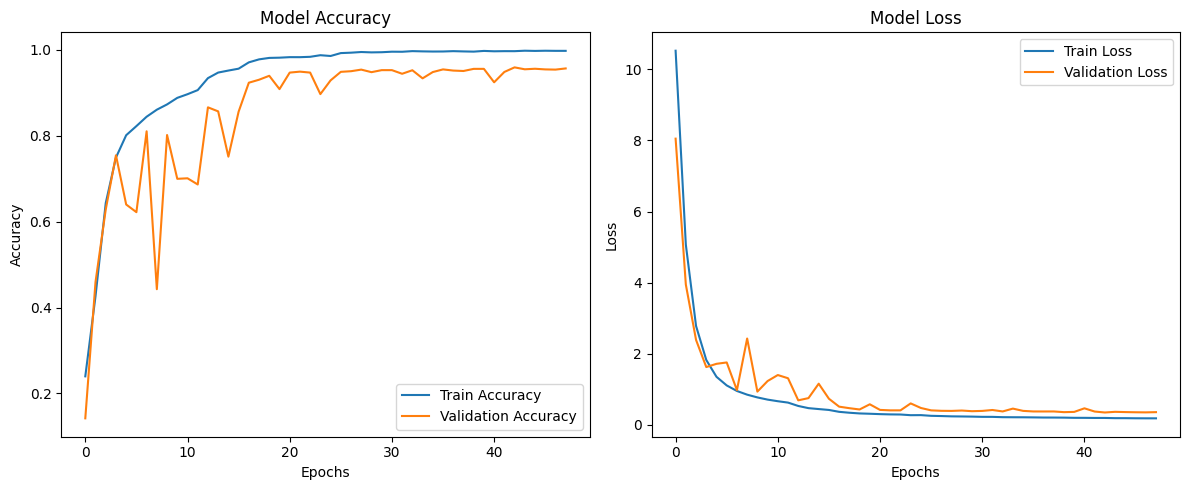

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

127/127 - 2s - 16ms/step - accuracy: 0.9606 - loss: 0.3283
Test Loss: 0.3283
Test Accuracy: 0.9606
Final Accuracy of the model: 96.06%
127/127 - 3s - 21ms/step
Sample Predictions:
True Labels: [3 0 3 5 1 2 3 3 1 6]
Predicted Labels: [3 0 3 5 1 2 3 3 1 6]


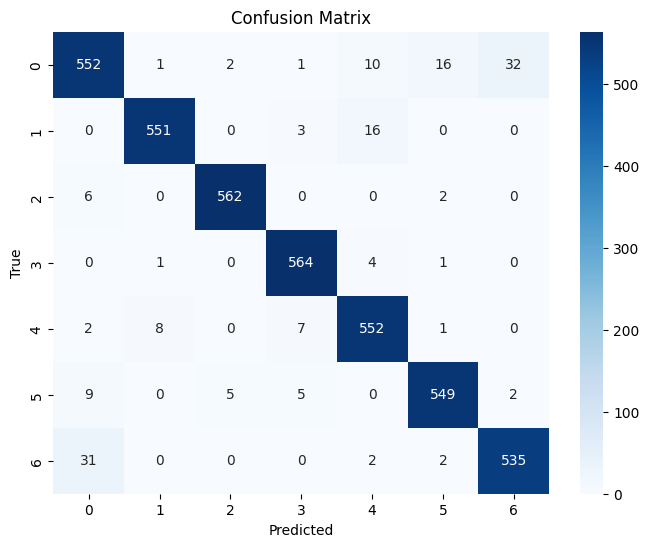

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix for multiclass classification (replace with your actual confusion matrix)
# CM format: nxn matrix for multiclass classification
CM = np.array([[552, 1, 2, 1, 10, 16, 32],
 [0, 551, 0, 3, 16, 0, 0],
 [6, 0, 562, 0, 0, 2, 0],
 [0, 1, 0, 564, 4, 1, 0],
 [2, 8, 0, 7, 552, 1, 0],
 [9, 0, 5, 5, 0, 549, 2],
 [31, 0, 0, 0, 2, 2, 535]] )

# Number of classes (n)
n = CM.shape[0]

# 1. Accuracy
accuracy = np.trace(CM) / np.sum(CM)

# Initialize variables for metrics
precision = np.zeros(n)
recall = np.zeros(n)
f1_score = np.zeros(n)
specificity = np.zeros(n)
mcc = np.zeros(n)

# 2. Precision, Recall, F1-Score, Specificity, and MCC for each class
for i in range(n):
    # True Positive, False Positive, False Negative, True Negative
    TP = CM[i, i]
    FN = np.sum(CM[i, :]) - TP
    FP = np.sum(CM[:, i]) - TP
    TN = np.sum(CM) - TP - FN - FP

    # Precision
    precision[i] = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall[i] = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1-Score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    # Specificity
    specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Matthews Correlation Coefficient (MCC)
    mcc[i] = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) != 0 else 0

# 3. Calculate average metrics across all classes
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)
avg_specificity = np.mean(specificity)
avg_mcc = np.mean(mcc)

# Print average metrics
print(f"\nAverage Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average Matthews Correlation Coefficient (MCC): {avg_mcc:.4f}")



Average Precision: 0.9585
Average Recall: 0.9588
Average F1-Score: 0.9586
Average Specificity: 0.9930
Average Matthews Correlation Coefficient (MCC): 0.9516


In [ ]:
# # Saving the model in H5 format
# model.save('/content/drive/MyDrive/Audio_Forensics_Models/test5.h5')
# print("Model saved")

Model saved


In [ ]:
import os
import numpy as np
import librosa
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler

# Class names: 'Bonafide' is class 0, and the spoof classes are A01 to A06
class_names = ['Bonafide', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06']

model_path = '/content/drive/MyDrive/Audio_Forensics_Models/test5.h5'
model = tf.keras.models.load_model(model_path)

# Preprocess the audio file (convert to Mel spectrogram and normalize)
def preprocess_audio(file_path, sr=11000, n_mels=256, max_time_frames=256):
    mel_spectrogram = audio_to_mel_spectrogram(file_path, sr, n_mels, max_time_frames)

    if mel_spectrogram is not None:
        # Normalize the spectrogram
        scaler = MinMaxScaler()
        mel_spectrogram_normalized = scaler.fit_transform(mel_spectrogram)

        # Reshape for CNN input (Add the channel dimension)
        mel_spectrogram_normalized = mel_spectrogram_normalized[..., np.newaxis]  # Channel = 1

        return mel_spectrogram_normalized
    else:
        return None

# Function to predict the class of an audio file
def predict_audio_class(file_path):
    # Preprocess the audio file
    mel_spectrogram = preprocess_audio(file_path)

    if mel_spectrogram is not None:
        # Make prediction using the loaded model
        mel_spectrogram = np.expand_dims(mel_spectrogram, axis=0)  # Add batch dimension
        prediction = model.predict(mel_spectrogram)

        # Get the predicted class index
        predicted_class_idx = np.argmax(prediction, axis=1)[0]

        # Get the class name based on the predicted index
        predicted_class = class_names[predicted_class_idx]

        print(f"Predicted class: {predicted_class}")
        return predicted_class
    else:
        print("Error processing audio file.")
        return None


# Example usage: Predict the class of a new audio file
file_path = '/content/drive/MyDrive/LA_Dataset_Final/Bonafide/LA_T_1607779.flac'  # Replace with the path to the audio file you want to predict
predicted_class = predict_audio_class(file_path)


Augmentations applied.
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: Bonafide


In [ ]:
import os
import numpy as np
import librosa
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from google.colab import files  # For file upload in Google Colab

# Class names: 'Bonafide' is class 0, and the spoof classes are A01 to A06
class_names = ['Bonafide', 'A01', 'A02', 'A03', 'A04', 'A05', 'A06']

# Load the model
model_path = '/content/drive/MyDrive/Audio_Forensics_Models/test5.h5'
model = tf.keras.models.load_model(model_path)

# Preprocess the audio file (convert to Mel spectrogram and normalize)
def preprocess_audio(file_path, sr=11000, n_mels=256, max_time_frames=256):
    mel_spectrogram = audio_to_mel_spectrogram(file_path, sr, n_mels, max_time_frames)

    if mel_spectrogram is not None:
        # Normalize the spectrogram
        scaler = MinMaxScaler()
        mel_spectrogram_normalized = scaler.fit_transform(mel_spectrogram)

        # Reshape for CNN input (Add the channel dimension)
        mel_spectrogram_normalized = mel_spectrogram_normalized[..., np.newaxis]  # Channel = 1

        return mel_spectrogram_normalized
    else:
        return None

# Function to predict the class of an audio file
def predict_audio_class(file_path):
    # Preprocess the audio file
    mel_spectrogram = preprocess_audio(file_path)

    if mel_spectrogram is not None:
        # Make prediction using the loaded model
        mel_spectrogram = np.expand_dims(mel_spectrogram, axis=0)  # Add batch dimension
        prediction = model.predict(mel_spectrogram)

        # Get the predicted class index
        predicted_class_idx = np.argmax(prediction, axis=1)[0]

        # Get the class name based on the predicted index
        predicted_class = class_names[predicted_class_idx]

        print(f"Predicted class: {predicted_class}")
        return predicted_class
    else:
        print("Error processing audio file.")
        return None

# Upload file from the local system
def upload_audio_file():
    uploaded = files.upload()  # File upload widget
    if uploaded:
        # Get the uploaded file path
        file_name = next(iter(uploaded))
        print(f"Uploaded file: {file_name}")
        return file_name
    else:
        print("No file uploaded.")
        return None

# Example usage: Upload the file and predict its class
uploaded_file_path = upload_audio_file()  # Upload an audio file from your local computer

if uploaded_file_path:
    predicted_class = predict_audio_class(uploaded_file_path)


Saving LA_E_1007872.flac to LA_E_1007872 (2).flac
Uploaded file: LA_E_1007872 (2).flac
Augmentations applied.
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 511ms/step
Predicted class: A06


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    BatchNormalization,
    GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_stronger_cnn_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN Layers
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Global Average Pooling for dimensionality reduction
    x = GlobalAveragePooling2D()(x)

    # Fully Connected Layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)  # Increased dropout for regularization
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)  # Increased dropout

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 1)  # Replace with your dataset's input shape
num_classes = 7  # Replace with the number of classes in your dataset

# Build the model
model = build_stronger_cnn_model(input_shape, num_classes)

# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_2           │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_14 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_15 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 7)                   │           1,7

 Total params: 1,949,447 (7.44 MB)

 Trainable params: 1,947,527 (7.43 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 52s 101ms/step - accuracy: 0.3030 - loss: 14.6454 - val_accuracy: 0.1413 - val_loss: 17.1843 - learning_rate: 1.0000e-04
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - accuracy: 0.6250 - loss: 8.8800 - val_accuracy: 0.1426 - val_loss: 18.6025 - learning_rate: 1.0000e-04
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.7469 - loss: 5.8334 - val_accuracy: 0.5336 - val_loss: 5.4971 - learning_rate: 1.0000e-04
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8086 - loss: 4.0819 - val_accuracy: 0.2296 - val_loss: 9.8041 - learning_rate: 1.0000e-04
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8640 - loss: 2.9375 - val_accuracy: 0.2517 - val_loss: 6.5454 - learning_rate: 1.0000e-04
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 15s 49ms/step - accuracy: 0.8869 - loss: 2.2344 - val_accuracy: 0.6090 - val_loss: 2.6900 - learning_rate: 1.0000e-04
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms

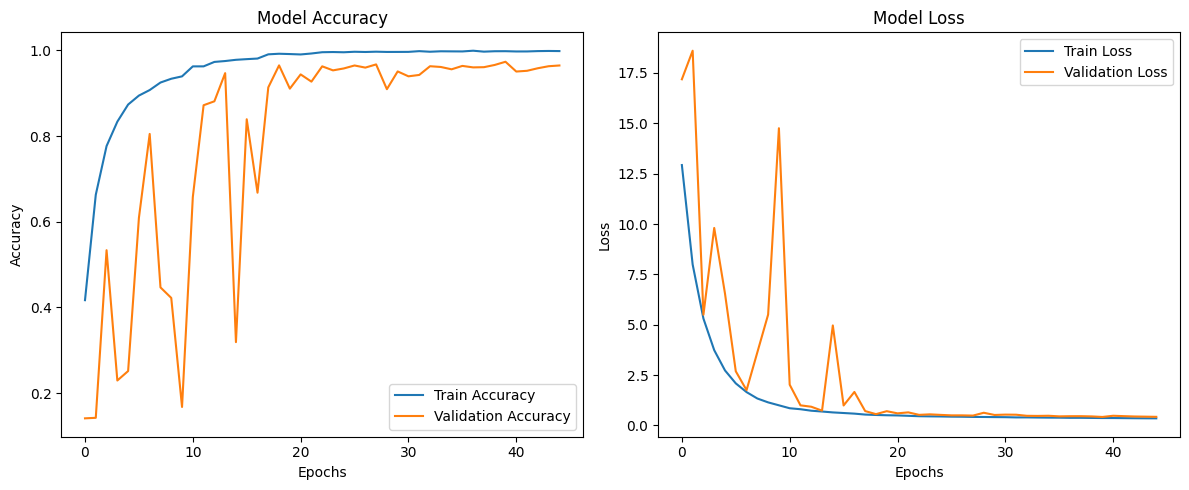

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

127/127 - 1s - 7ms/step - accuracy: 0.9747 - loss: 0.4183
Test Loss: 0.4183
Test Accuracy: 0.9747
Final Accuracy of the model: 97.47%
127/127 - 3s - 26ms/step
Sample Predictions:
True Labels: [3 0 3 5 1 2 3 3 1 6]
Predicted Labels: [3 0 3 5 1 2 3 3 1 6]


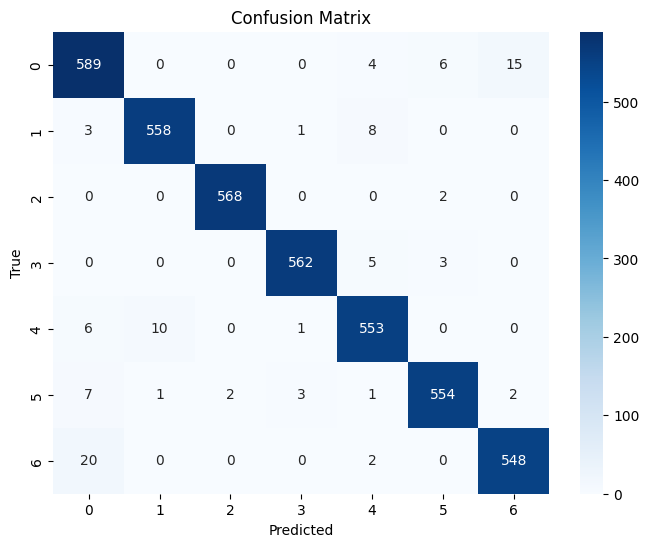

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix for multiclass classification (replace with your actual confusion matrix)
# CM format: nxn matrix for multiclass classification
CM = np.array([[589, 0, 0, 0, 4, 6, 15],
               [3, 538, 10, 1, 8, 0, 0],
               [0, 0, 568, 0, 0, 2, 0],
               [0, 0, 0, 562, 5, 3, 0],
               [6, 10, 0, 21, 503, 10, 20],
               [7, 1, 2, 3, 1, 554, 2],
               [20, 0, 0, 10, 32, 0, 508]])

# Number of classes (n)
n = CM.shape[0]

# 1. Accuracy
accuracy = np.trace(CM) / np.sum(CM)

# Initialize variables for metrics
precision = np.zeros(n)
recall = np.zeros(n)
f1_score = np.zeros(n)
specificity = np.zeros(n)
mcc = np.zeros(n)

# 2. Precision, Recall, F1-Score, Specificity, and MCC for each class
for i in range(n):
    # True Positive, False Positive, False Negative, True Negative
    TP = CM[i, i]
    FN = np.sum(CM[i, :]) - TP
    FP = np.sum(CM[:, i]) - TP
    TN = np.sum(CM) - TP - FN - FP

    # Precision
    precision[i] = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall[i] = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1-Score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    # Specificity
    specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Matthews Correlation Coefficient (MCC)
    mcc[i] = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) != 0 else 0

# 3. Calculate average metrics across all classes
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)
avg_specificity = np.mean(specificity)
avg_mcc = np.mean(mcc)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average Matthews Correlation Coefficient (MCC): {avg_mcc:.4f}")


Accuracy: 0.9498
Average Precision: 0.9497
Average Recall: 0.9497
Average F1-Score: 0.9495
Average Specificity: 0.9916
Average Matthews Correlation Coefficient (MCC): 0.9413


In [ ]:
# Saving the model in H5 format
model.save('/content/drive/MyDrive/Audio_Forensics_Models/CNN.h5')
print("Model saved")

Model saved


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Reshape,
    LSTM,
    Dense,
    Dropout,
    BatchNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_lstm_only_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # Reshape the input to fit LSTM requirements
    x = Reshape((input_shape[0], -1))(inputs)  # Combine width and channels into one feature dimension

    # LSTM Layers
    x = LSTM(512, return_sequences=True, dropout=0.3)(x)
    x = BatchNormalization()(x)
    x = LSTM(256, dropout=0.3)(x)
    x = BatchNormalization()(x)

    # Fully Connected Layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 1)  # Replace with your dataset's input shape
num_classes = 7  # Replace with the number of classes in your dataset

# Build the model
model = build_lstm_only_model(input_shape, num_classes)

# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_4 (Reshape)                  │ (None, 256, 256)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ (None, 256, 512)            │       1,574,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 256, 512)            │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 256)                 │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_16 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_17 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 7)                   │           1,799 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,630,151 (10.03 MB)

 Trainable params: 2,628,615 (10.03 MB)

 Non-trainable params: 1,536 (6.00 KB)

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 18s 41ms/step - accuracy: 0.1584 - loss: 8.8593 - val_accuracy: 0.2234 - val_loss: 7.6651 - learning_rate: 1.0000e-04
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.1994 - loss: 7.5245 - val_accuracy: 0.2586 - val_loss: 6.6166 - learning_rate: 1.0000e-04
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.2351 - loss: 6.4375 - val_accuracy: 0.2772 - val_loss: 5.6867 - learning_rate: 1.0000e-04
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.2505 - loss: 5.5114 - val_accuracy: 0.2871 - val_loss: 4.8624 - learning_rate: 1.0000e-04
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 10s 35ms/step - accuracy: 0.2718 - loss: 4.7184 - val_accuracy: 0.3114 - val_loss: 4.1381 - learning_rate: 1.0000e-04
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/step - accuracy: 0.2958 - loss: 4.0289 - val_accuracy: 0.3221 - val_loss: 3.5606 - learning_rate: 1.0000e-04
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 11s 36ms/ste

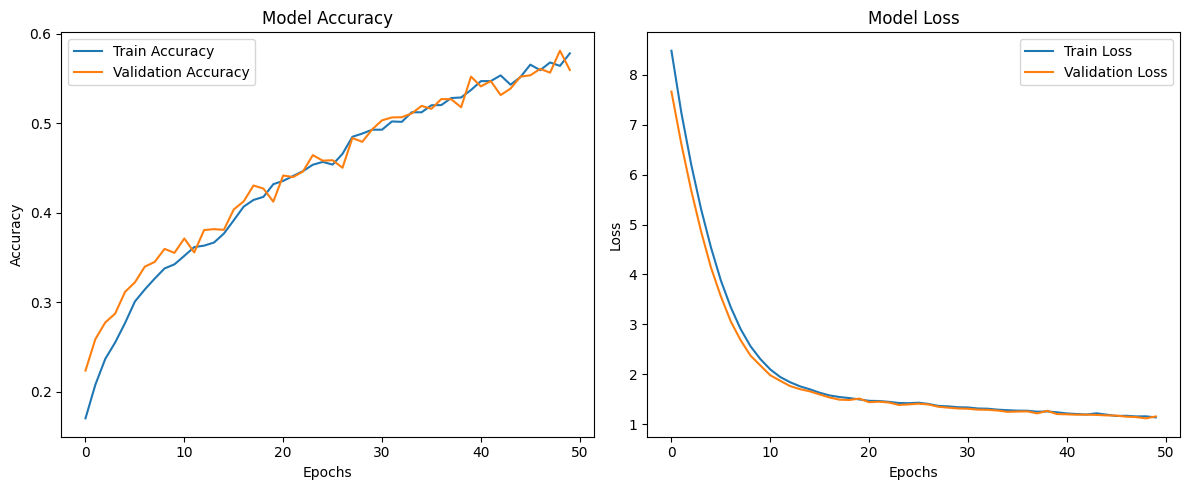

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

127/127 - 2s - 12ms/step - accuracy: 0.5662 - loss: 1.1360
Test Loss: 1.1360
Test Accuracy: 0.5662
Final Accuracy of the model: 56.62%
127/127 - 2s - 15ms/step
Sample Predictions:
True Labels: [3 0 3 5 1 2 3 3 1 6]
Predicted Labels: [3 2 3 5 4 2 4 4 3 6]


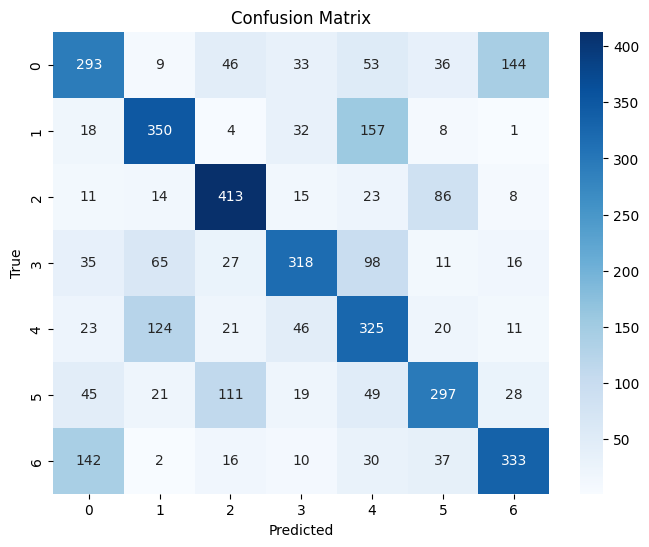

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix for multiclass classification (replace with your actual confusion matrix)
# CM format: nxn matrix for multiclass classification
CM = np.array([[293, 9, 46, 33, 53, 36, 144],
 [18, 350, 4, 32, 157, 8, 1],
 [11, 14, 413, 15, 23, 86, 8],
 [35, 65, 27, 318, 98, 11, 16],
 [23, 124, 21, 46, 325, 20, 11],
 [45, 21, 111, 19, 49, 297, 28],
 [142, 2, 16, 10, 30, 37, 333]])

# Number of classes (n)
n = CM.shape[0]

# 1. Accuracy
accuracy = np.trace(CM) / np.sum(CM)

# Initialize variables for metrics
precision = np.zeros(n)
recall = np.zeros(n)
f1_score = np.zeros(n)
specificity = np.zeros(n)
mcc = np.zeros(n)

# 2. Precision, Recall, F1-Score, Specificity, and MCC for each class
for i in range(n):
    # True Positive, False Positive, False Negative, True Negative
    TP = CM[i, i]
    FN = np.sum(CM[i, :]) - TP
    FP = np.sum(CM[:, i]) - TP
    TN = np.sum(CM) - TP - FN - FP

    # Precision
    precision[i] = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall[i] = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1-Score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    # Specificity
    specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Matthews Correlation Coefficient (MCC)
    mcc[i] = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) != 0 else 0

# 3. Calculate average metrics across all classes
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)
avg_specificity = np.mean(specificity)
avg_mcc = np.mean(mcc)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average Matthews Correlation Coefficient (MCC): {avg_mcc:.4f}")


Accuracy: 0.5773
Average Precision: 0.5846
Average Recall: 0.5784
Average F1-Score: 0.5787
Average Specificity: 0.9295
Average Matthews Correlation Coefficient (MCC): 0.5103


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    Reshape,
    LSTM,
    BatchNormalization,
    GlobalAveragePooling2D
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_stronger_cnn_lstm_model_v2(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN Layers
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Reshape for LSTM
    x = Reshape((x.shape[1], -1))(x)

    # LSTM Layers
    x = LSTM(512, return_sequences=True, dropout=0.3)(x)  # Increased LSTM units
    x = LSTM(256, dropout=0.3)(x)  # Increased LSTM units

    # Fully Connected Layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)  # Increased neurons
    x = Dropout(0.5)(x)  # Increased dropout for regularization
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)  # Increased dropout

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 1)  # Replace with your dataset's input shape
num_classes = 7  # Replace with the number of classes in your dataset

# Build the model
model = build_stronger_cnn_lstm_model_v2(input_shape, num_classes)

# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_4 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_15 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_5 (Reshape)                  │ (None, 16, 8192)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 16, 512)             │      17,827,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 256)                 │         787,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 512)                 │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_18 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 20,433,671 (77.95 MB)

 Trainable params: 20,431,751 (77.94 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 55s 154ms/step - accuracy: 0.2033 - loss: 13.2745 - val_accuracy: 0.1413 - val_loss: 9.6706 - learning_rate: 1.0000e-04
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.3491 - loss: 8.0929 - val_accuracy: 0.1413 - val_loss: 8.4955 - learning_rate: 1.0000e-04
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.5687 - loss: 5.0235 - val_accuracy: 0.1852 - val_loss: 5.3753 - learning_rate: 1.0000e-04
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.6974 - loss: 3.3948 - val_accuracy: 0.3714 - val_loss: 3.9063 - learning_rate: 1.0000e-04
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.7546 - loss: 2.4980 - val_accuracy: 0.5192 - val_loss: 2.8983 - learning_rate: 1.0000e-04
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 40s 137ms/step - accuracy: 0.8079 - loss: 1.9114 - val_accuracy: 0.4493 - val_loss: 3.1102 - learning_rate: 1.0000e-04
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 41s 1

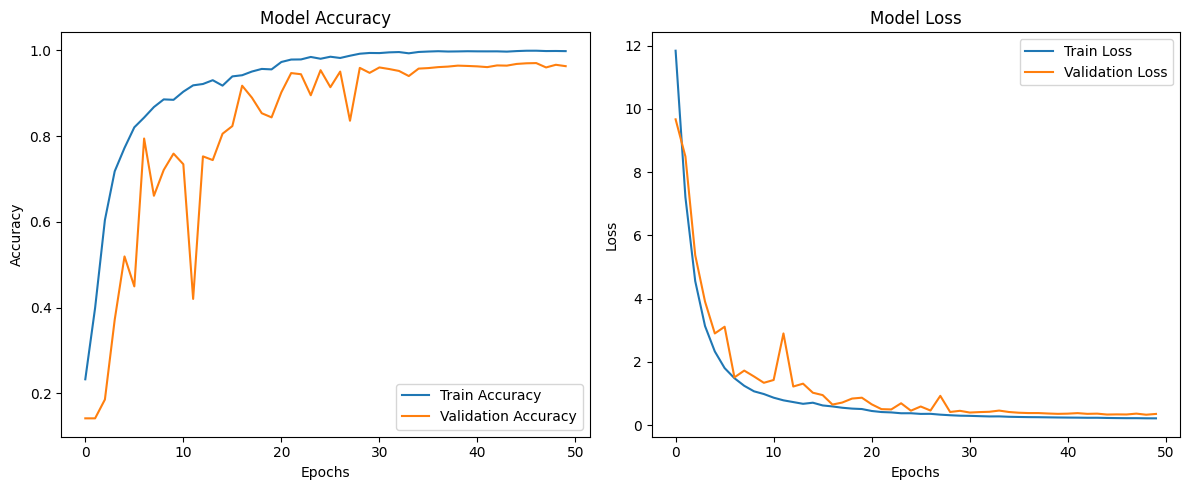

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

127/127 - 2s - 16ms/step - accuracy: 0.9636 - loss: 0.3427
Test Loss: 0.3427
Test Accuracy: 0.9636
Final Accuracy of the model: 96.36%
127/127 - 2s - 16ms/step
Sample Predictions:
True Labels: [3 0 3 5 1 2 3 3 1 6]
Predicted Labels: [3 0 3 5 1 2 3 3 1 6]


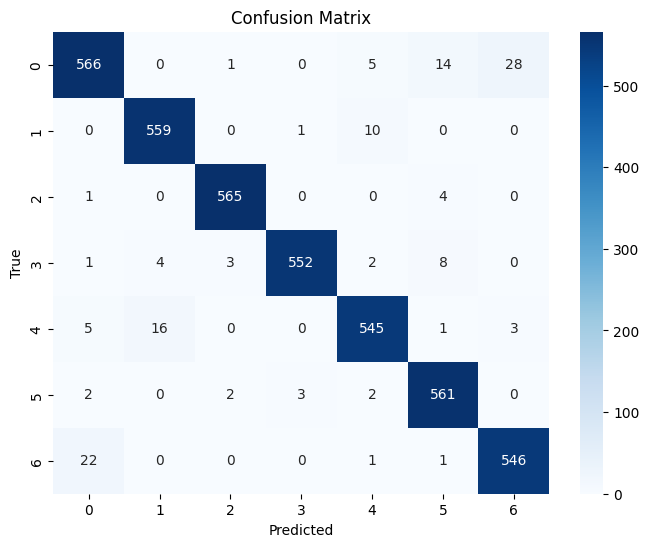


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       614
           1       0.97      0.98      0.97       570
           2       0.99      0.99      0.99       570
           3       0.99      0.97      0.98       570
           4       0.96      0.96      0.96       570
           5       0.95      0.98      0.97       570
           6       0.95      0.96      0.95       570

    accuracy                           0.97      4034
   macro avg       0.97      0.97      0.97      4034
weighted avg       0.97      0.97      0.97      4034



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

# Get predictions
predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report including precision, recall, f1-score
print("\nClassification Report:")
report = classification_report(true_classes, predicted_classes)
print(report)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix for multiclass classification (replace with your actual confusion matrix)
# CM format: nxn matrix for multiclass classification
CM = np.array([[566, 0, 1, 0, 5, 14, 28],
 [0, 559, 0, 1, 10, 0, 0],
 [1, 0, 565, 0, 0, 4, 0],
 [1, 4, 3, 532, 2, 28, 0],
 [5, 16, 0, 0, 545, 1, 3],
 [2, 0, 2, 3, 2, 561, 0],
 [22, 0, 0, 0, 1, 1, 546]])

# Number of classes (n)
n = CM.shape[0]

# 1. Accuracy
accuracy = np.trace(CM) / np.sum(CM)

# Initialize variables for metrics
precision = np.zeros(n)
recall = np.zeros(n)
f1_score = np.zeros(n)
specificity = np.zeros(n)
mcc = np.zeros(n)

# 2. Precision, Recall, F1-Score, Specificity, and MCC for each class
for i in range(n):
    # True Positive, False Positive, False Negative, True Negative
    TP = CM[i, i]
    FN = np.sum(CM[i, :]) - TP
    FP = np.sum(CM[:, i]) - TP
    TN = np.sum(CM) - TP - FN - FP

    # Precision
    precision[i] = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall[i] = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1-Score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    # Specificity
    specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Matthews Correlation Coefficient (MCC)
    mcc[i] = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) != 0 else 0

# 3. Calculate average metrics across all classes
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)
avg_specificity = np.mean(specificity)
avg_mcc = np.mean(mcc)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average Matthews Correlation Coefficient (MCC): {avg_mcc:.4f}")


Accuracy: 0.9603
Average Precision: 0.9611
Average Recall: 0.9608
Average F1-Score: 0.9606
Average Specificity: 0.9934
Average Matthews Correlation Coefficient (MCC): 0.9542


In [ ]:
# Saving the model in H5 format
model.save('/content/drive/MyDrive/Audio_Forensics_Models/CNN_LSTM.h5')
print("Model saved")

Model saved


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input,
    Conv2D,
    MaxPooling2D,
    Flatten,
    Dense,
    Dropout,
    Reshape,
    LSTM,
    Bidirectional,
    BatchNormalization,
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2

def build_stronger_cnn_bilstm_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN Layers
    x = Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(inputs)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(256, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    x = Conv2D(512, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01))(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)

    # Reshape for LSTM
    x = Reshape((x.shape[1], -1))(x)

    # BiLSTM Layers
    x = Bidirectional(LSTM(512, return_sequences=True, dropout=0.3))(x)  # Increased LSTM units
    x = Bidirectional(LSTM(256, dropout=0.3))(x)  # Increased LSTM units

    # Fully Connected Layers
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)  # Increased neurons
    x = Dropout(0.5)(x)  # Increased dropout for regularization
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)  # Increased dropout

    outputs = Dense(num_classes, activation='softmax')(x)

    model = Model(inputs, outputs)
    return model

# Define input shape and number of classes
input_shape = (256, 256, 1)  # Replace with your dataset's input shape
num_classes = 7  # Replace with the number of classes in your dataset

# Build the model
model = build_stronger_cnn_bilstm_model(input_shape, num_classes)

# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)           │ (None, 256, 256, 1)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 256, 256, 64)        │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_18               │ (None, 256, 256, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_16 (MaxPooling2D)      │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_19               │ (None, 128, 128, 128)       │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_17 (MaxPooling2D)      │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_20               │ (None, 64, 64, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_18 (MaxPooling2D)      │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_21               │ (None, 32, 32, 512)         │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape_6 (Reshape)                  │ (None, 16, 8192)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 16, 1024)            │      35,655,680 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 512)                 │       2,623,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_20 (Dropout)                 │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 40,228,615 (153.46 MB)

 Trainable params: 40,226,695 (153.45 MB)

 Non-trainable params: 1,920 (7.50 KB)

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 52s 153ms/step - accuracy: 0.2132 - loss: 14.9236 - val_accuracy: 0.1384 - val_loss: 11.0557 - learning_rate: 1.0000e-04
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.4210 - loss: 9.3418 - val_accuracy: 0.1413 - val_loss: 9.7753 - learning_rate: 1.0000e-04
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.6696 - loss: 5.8204 - val_accuracy: 0.4376 - val_loss: 5.4146 - learning_rate: 1.0000e-04
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.7844 - loss: 3.8556 - val_accuracy: 0.7724 - val_loss: 3.0732 - learning_rate: 1.0000e-04
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.8219 - loss: 2.7589 - val_accuracy: 0.8621 - val_loss: 2.1573 - learning_rate: 1.0000e-04
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 146ms/step - accuracy: 0.8581 - loss: 2.0613 - val_accuracy: 0.8525 - val_loss: 1.7568 - learning_rate: 1.0000e-04
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 43s 

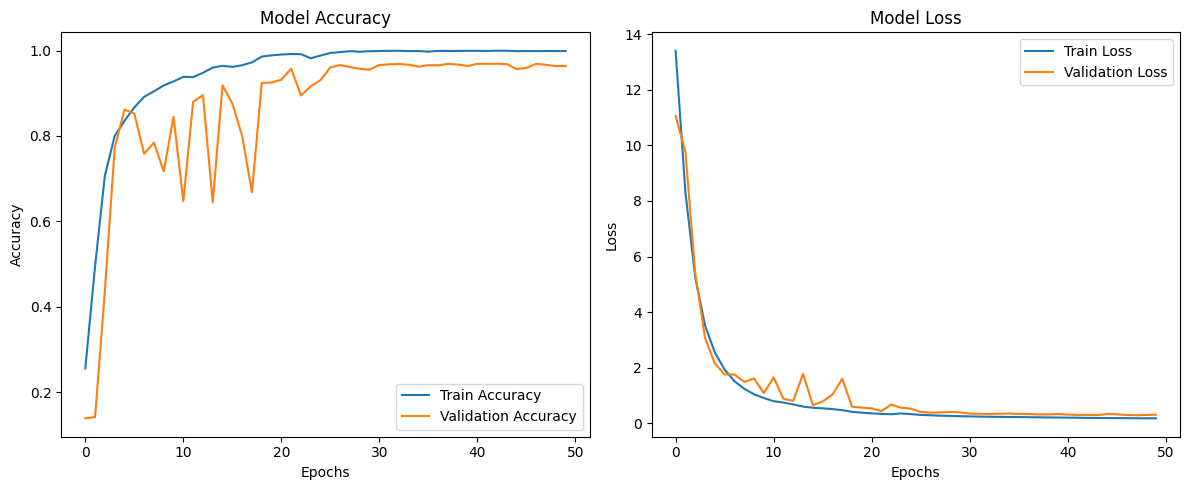

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

127/127 - 2s - 17ms/step - accuracy: 0.9680 - loss: 0.3020
Test Loss: 0.3020
Test Accuracy: 0.9680
Final Accuracy of the model: 96.80%
127/127 - 3s - 26ms/step
Sample Predictions:
True Labels: [3 0 3 5 1 2 3 3 1 6]
Predicted Labels: [3 0 3 5 1 2 3 3 1 6]


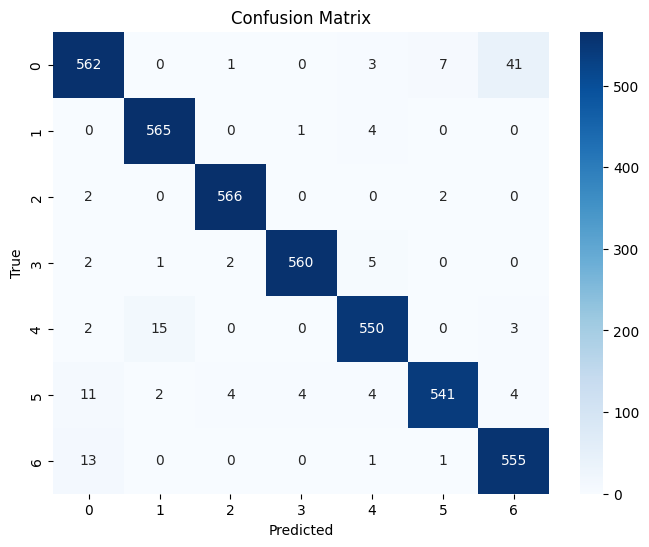


Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       614
           1       0.97      0.99      0.98       570
           2       0.99      0.99      0.99       570
           3       0.99      0.98      0.99       570
           4       0.97      0.96      0.97       570
           5       0.98      0.95      0.97       570
           6       0.92      0.97      0.95       570

    accuracy                           0.97      4034
   macro avg       0.97      0.97      0.97      4034
weighted avg       0.97      0.97      0.97      4034



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

# Get predictions
predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report including precision, recall, f1-score
print("\nClassification Report:")
report = classification_report(true_classes, predicted_classes)
print(report)


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Example confusion matrix for multiclass classification (replace with your actual confusion matrix)
# CM format: nxn matrix for multiclass classification
CM = np.array([[562, 0, 1, 0, 3, 7, 41],
 [0, 505, 30, 1, 34, 0, 0],
 [2, 0, 446, 90, 30, 2, 0],
 [2, 1, 2, 560, 5, 0, 0],
 [2, 15, 10, 10, 530, 0, 3],
 [11, 12, 4, 4, 4, 521, 14],
 [13, 0, 0, 0, 1, 1, 555]])

# Number of classes (n)
n = CM.shape[0]

# 1. Accuracy
accuracy = np.trace(CM) / np.sum(CM)

# Initialize variables for metrics
precision = np.zeros(n)
recall = np.zeros(n)
f1_score = np.zeros(n)
specificity = np.zeros(n)
mcc = np.zeros(n)

# 2. Precision, Recall, F1-Score, Specificity, and MCC for each class
for i in range(n):
    # True Positive, False Positive, False Negative, True Negative
    TP = CM[i, i]
    FN = np.sum(CM[i, :]) - TP
    FP = np.sum(CM[:, i]) - TP
    TN = np.sum(CM) - TP - FN - FP

    # Precision
    precision[i] = TP / (TP + FP) if (TP + FP) != 0 else 0

    # Recall
    recall[i] = TP / (TP + FN) if (TP + FN) != 0 else 0

    # F1-Score
    f1_score[i] = 2 * (precision[i] * recall[i]) / (precision[i] + recall[i]) if (precision[i] + recall[i]) != 0 else 0

    # Specificity
    specificity[i] = TN / (TN + FP) if (TN + FP) != 0 else 0

    # Matthews Correlation Coefficient (MCC)
    mcc[i] = (TP * TN - FP * FN) / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN)) if (TP + FP) * (TP + FN) * (TN + FP) * (TN + FN) != 0 else 0

# 3. Calculate average metrics across all classes
avg_precision = np.mean(precision)
avg_recall = np.mean(recall)
avg_f1_score = np.mean(f1_score)
avg_specificity = np.mean(specificity)
avg_mcc = np.mean(mcc)

# Print results
print(f"Accuracy: {accuracy:.4f}")
print(f"Average Precision: {avg_precision:.4f}")
print(f"Average Recall: {avg_recall:.4f}")
print(f"Average F1-Score: {avg_f1_score:.4f}")
print(f"Average Specificity: {avg_specificity:.4f}")
print(f"Average Matthews Correlation Coefficient (MCC): {avg_mcc:.4f}")


Accuracy: 0.9120
Average Precision: 0.9148
Average Recall: 0.9120
Average F1-Score: 0.9113
Average Specificity: 0.9853
Average Matthews Correlation Coefficient (MCC): 0.8981


In [ ]:
import tensorflow as tf
import keras
import matplotlib
import pandas as pd
import numpy as np
import librosa

# Print the versions of the specified libraries
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras version: {keras.__version__}")
print(f"Matplotlib version: {matplotlib.__version__}")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Librosa version: {librosa.__version__}")


TensorFlow version: 2.17.1
Keras version: 3.5.0
Matplotlib version: 3.10.0
Pandas version: 2.2.2
NumPy version: 1.26.4
Librosa version: 0.10.2.post1


In [ ]:
# # Saving the model in H5 format
# model.save('/content/drive/MyDrive/Audio_Forensics_Models/CNN_BiLSTM.h5')
# print("Model saved")

Model saved


In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import (
    Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Reshape, LSTM,
    Bidirectional, BatchNormalization, Multiply, Softmax, LayerNormalization
)
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import l2
from tensorflow.keras.backend import int_shape


def multi_scale_conv_block(inputs, filters):
    """Multi-Scale Convolutional Block"""
    x1 = Conv2D(filters, (3, 3), padding='same', activation='relu')(inputs)
    x2 = Conv2D(filters, (5, 5), padding='same', activation='relu')(inputs)
    x3 = Conv2D(filters, (7, 7), padding='same', activation='relu')(inputs)
    return tf.keras.layers.Concatenate()([x1, x2, x3])


def squeeze_excitation_block(inputs, ratio=16):
    """Squeeze-and-Excitation Block"""
    filters = inputs.shape[-1]
    se = tf.keras.layers.GlobalAveragePooling2D()(inputs)
    se = Dense(filters // ratio, activation='relu')(se)
    se = Dense(filters, activation='sigmoid')(se)
    return Multiply()([inputs, se])


def attention_block(inputs):
    """Self-Attention Mechanism"""
    attention_score = Dense(inputs.shape[-1], activation='tanh')(inputs)
    attention_score = Dense(1, activation='linear')(attention_score)
    attention_weights = Softmax(axis=1)(attention_score)
    context_vector = Multiply()([inputs, attention_weights])
    return context_vector


def build_novel_cnn_bilstm_model(input_shape, num_classes):
    inputs = Input(shape=input_shape)

    # CNN Layers with Multi-Scale and SE blocks
    x = multi_scale_conv_block(inputs, 64)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = squeeze_excitation_block(x)

    x = multi_scale_conv_block(x, 128)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = squeeze_excitation_block(x)

    x = multi_scale_conv_block(x, 256)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = squeeze_excitation_block(x)

    x = multi_scale_conv_block(x, 512)
    x = BatchNormalization()(x)
    x = MaxPooling2D(pool_size=(2, 2))(x)
    x = squeeze_excitation_block(x)

    # Reshape for LSTM
    x_shape = int_shape(x)  # Get the dynamic shape of x
    x = Reshape((x_shape[1] * x_shape[2], x_shape[3]))(x)

    # BiLSTM Layers with Attention
    x = Bidirectional(LSTM(512, return_sequences=True, dropout=0.3))(x)
    x = Bidirectional(LSTM(256, return_sequences=True, dropout=0.3))(x)

    # Attention Mechanism
    x = attention_block(x)

    # Fully Connected Layers
    x = LayerNormalization()(x)  # Layer normalization for stability
    x = Dense(512, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)
    x = Dense(256, activation='relu', kernel_regularizer=l2(0.01))(x)
    x = Dropout(0.5)(x)

    # Output Layer
    # Use only the last time step of the BiLSTM output
    x = tf.keras.layers.Lambda(lambda t: t[:, -1, :])(x)
    outputs = Dense(num_classes, activation='softmax')(x)


    model = Model(inputs, outputs)
    return model


# Define input shape and number of classes
input_shape = (256, 256, 1)  # Replace with your dataset's input shape
num_classes = 7  # Replace with the number of classes in your dataset

# Build the model
model = build_novel_cnn_bilstm_model(input_shape, num_classes)

# Compile the model with AdamW optimizer
model.compile(optimizer=tf.keras.optimizers.AdamW(learning_rate=1e-4),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Model Summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 256, 256, 1)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d (Conv2D)           │ (None, 256, 256, 64)   │            640 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_1 (Conv2D)         │ (None, 256, 256, 64)   │          1,664 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_2 (Conv2D)         │ (None, 256, 256, 64)   │          3,200 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 256, 256, 192)  │              0 │ conv2d[0][0],          │
│                           │                        │                │ conv2d_1[0][0],        │
│                           │                        │                │ conv2d_2[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 256, 256, 192)  │            768 │ concatenate[0][0]      │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d             │ (None, 128, 128, 192)  │              0 │ batch_normalization[0… │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ global_average_pooling2d  │ (None, 192)            │              0 │ max_pooling2d[0][0]    │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense (Dense)             │ (None, 12)             │          2,316 │ global_average_poolin… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_1 (Dense)           │ (None, 192)            │          2,496 │ dense[0][0]            │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multiply (Multiply)       │ (None, 128, 128, 192)  │              0 │ max_pooling2d[0][0],   │
│                           │                        │                │ dense_1[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_3 (Conv2D)         │ (None, 128, 128, 128)  │        221,312 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_4 (Conv2D)         │ (None, 128, 128, 128)  │        614,528 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 128, 128, 128)  │      1,204,352 │ multiply[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate_1             │ (None, 128, 128, 384)  │              0 │ conv2d_3[0][0],        │
│ (Concatenate)             │                        │                │ conv2d_4[0][0],        │
│                           │                        │                │ conv2d_5[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1

 Total params: 54,926,588 (209.53 MB)

 Trainable params: 54,920,828 (209.51 MB)

 Non-trainable params: 5,760 (22.50 KB)

Epoch 1/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 338s 901ms/step - accuracy: 0.1745 - loss: 8.6135 - val_accuracy: 0.1408 - val_loss: 5.0689 - learning_rate: 1.0000e-04
Epoch 2/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 213s 723ms/step - accuracy: 0.2834 - loss: 4.2502 - val_accuracy: 0.1413 - val_loss: 3.3059 - learning_rate: 1.0000e-04
Epoch 3/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 213s 724ms/step - accuracy: 0.3278 - loss: 2.5622 - val_accuracy: 0.1096 - val_loss: 2.7069 - learning_rate: 1.0000e-04
Epoch 4/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 213s 723ms/step - accuracy: 0.3445 - loss: 1.9884 - val_accuracy: 0.2246 - val_loss: 4.7528 - learning_rate: 1.0000e-04
Epoch 5/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 213s 724ms/step - accuracy: 0.4670 - loss: 1.4723 - val_accuracy: 0.3147 - val_loss: 3.6571 - learning_rate: 1.0000e-04
Epoch 6/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 213s 724ms/step - accuracy: 0.5517 - loss: 1.2328 - val_accuracy: 0.5822 - val_loss: 1.1992 - learning_rate: 1.0000e-04
Epoch 7/50
295/295 ━━━━━━━━━━━━━━━━━━━━ 

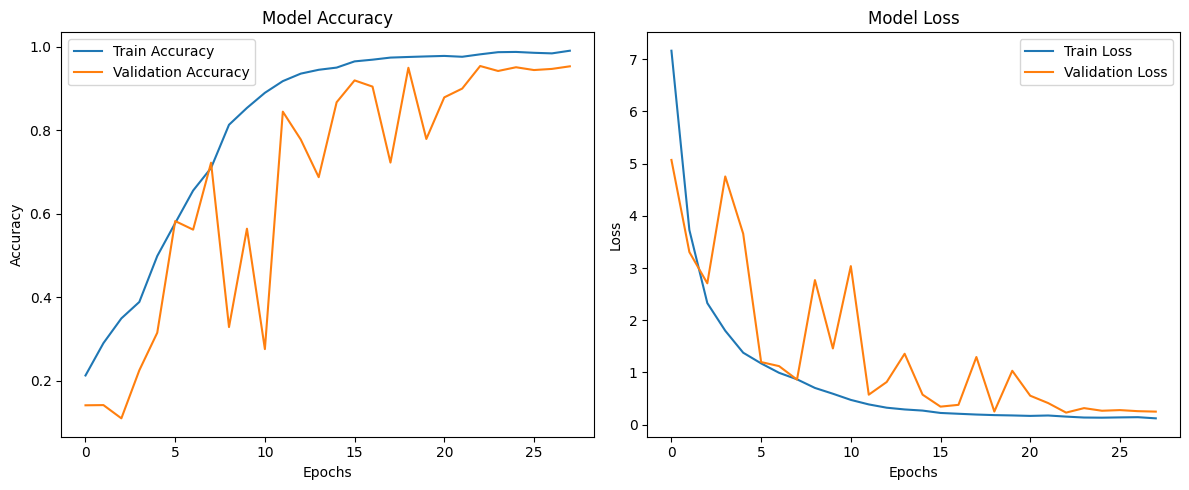

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Set up Early Stopping and Learning Rate Reduction
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_reduction = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.5, min_lr=0.00001)

# Train the model
history = model.fit(
    X_train,
    y_train,
    validation_data=(X_val, y_val),
    batch_size=64,
    epochs=50,
    verbose=1,
    callbacks=[early_stopping, lr_reduction]
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

127/127 - 13s - 101ms/step - accuracy: 0.9507 - loss: 0.2450
Test Loss: 0.2450
Test Accuracy: 0.9507
Final Accuracy of the model: 95.07%
127/127 - 14s - 112ms/step
Sample Predictions:
True Labels: [3 0 3 5 1 2 3 3 1 6]
Predicted Labels: [3 0 3 5 1 2 3 3 1 6]


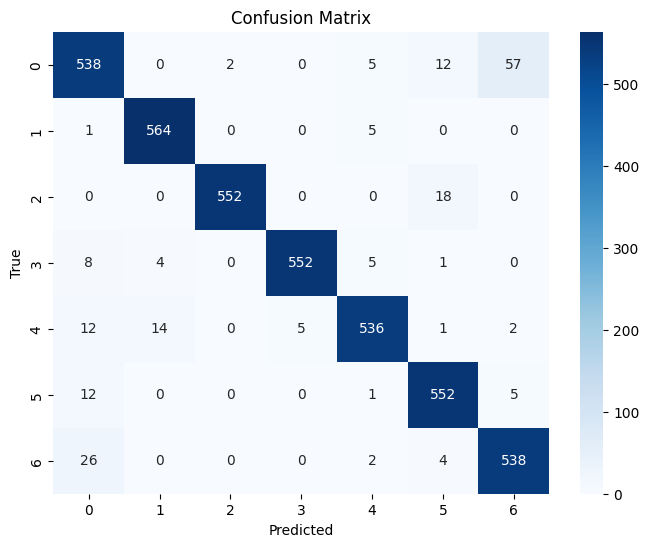


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89       614
           1       0.97      0.99      0.98       570
           2       1.00      0.97      0.98       570
           3       0.99      0.97      0.98       570
           4       0.97      0.94      0.95       570
           5       0.94      0.97      0.95       570
           6       0.89      0.94      0.92       570

    accuracy                           0.95      4034
   macro avg       0.95      0.95      0.95      4034
weighted avg       0.95      0.95      0.95      4034



In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# No need to one-hot encode since you're using sparse_categorical_crossentropy
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Final Accuracy of the model: {test_accuracy * 100:.2f}%")

# Get predictions
predictions = model.predict(X_test, verbose=2)
predicted_classes = predictions.argmax(axis=1)

# Comparing predictions with true labels
true_classes = y_test
print("Sample Predictions:")
print(f"True Labels: {true_classes[:10]}")
print(f"Predicted Labels: {predicted_classes[:10]}")

# Confusion Matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# Classification Report including precision, recall, f1-score
print("\nClassification Report:")
report = classification_report(true_classes, predicted_classes)
print(report)
